### DSC680 Sri R Sankaranarayanan
## Applied Data Science - Project 1 (week 1 - 4)
### Marketing Campaign for Banking Products 

July 2022

## Importing Libraries

In [1]:
#loading required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import figure
from statsmodels.stats.outliers_influence import variance_inflation_factor 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score,roc_curve,auc
from scipy.sparse import hstack
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDClassifier
import tqdm.notebook as tq
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## Load the Data

In [2]:
df = pd.read_csv("bank-additional/bank-additional-full.csv",sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
print("Number of rows",df.shape[0])

Number of rows 41188


In [4]:
print("Number of features/columns",df.shape[1])

Number of features/columns 21


## Check the datatype

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Perform EDA on the Dataset as required

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Data Looks neat without any missing values, 'y' variable is our target variable and we will check the distribution of this variable.

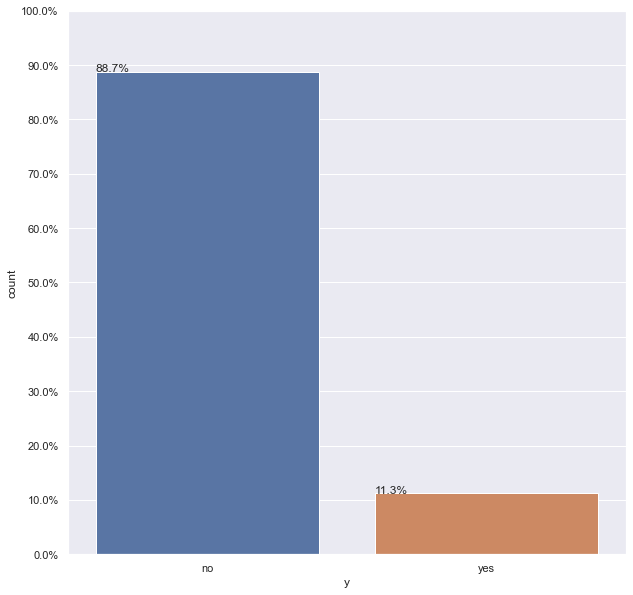

In [8]:
figure(figsize=(10,10))
total=len(df['y'])
sns.set()
plot=sns.countplot(x=df['y'],data=df)

for p in plot.patches:
   plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
plot.yaxis.set_ticks(np.linspace(0, total, 11))
plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
plt.show()

This proves our Dataset is highly imbalanced. It is evident that the last marketing campaign yielded only 11.3% results and we will use this distribution to calculate the success of this campaign and will recommend future campaigns on what could go well. 

In [9]:
def countplot_columns(columns):
    figure(figsize=(15,10))
    plot=sns.countplot(x=columns,data=df)
    total=len(df['y'])
    
    for p in plot.patches:
        
        plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
    plot.yaxis.set_ticks(np.linspace(0, total, 11))
    plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
    plt.show()

In [10]:
def countplot_target_varaible(columns,classes):
    figure(figsize=(15,10))
    total=len(df[classes])
    plot=sns.countplot(x=columns,data=df,hue=classes)
    for p in plot.patches:
        plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
    plot.yaxis.set_ticks(np.linspace(0, total, 11))
    plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
    plt.show()

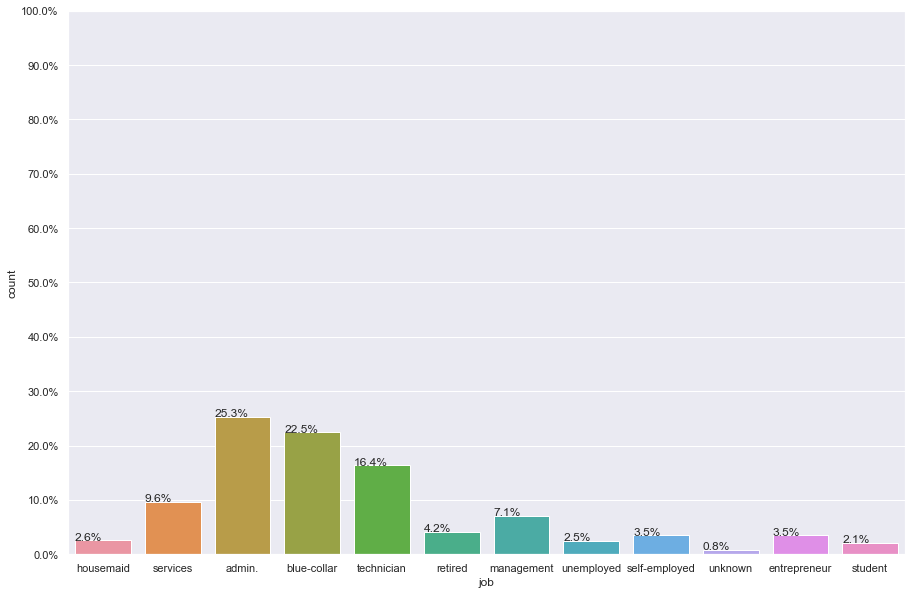

In [11]:
countplot_columns('job')

Looks like customers with admin and blue-collar jobs have been contacted by the Bank for the campaign more than others. 

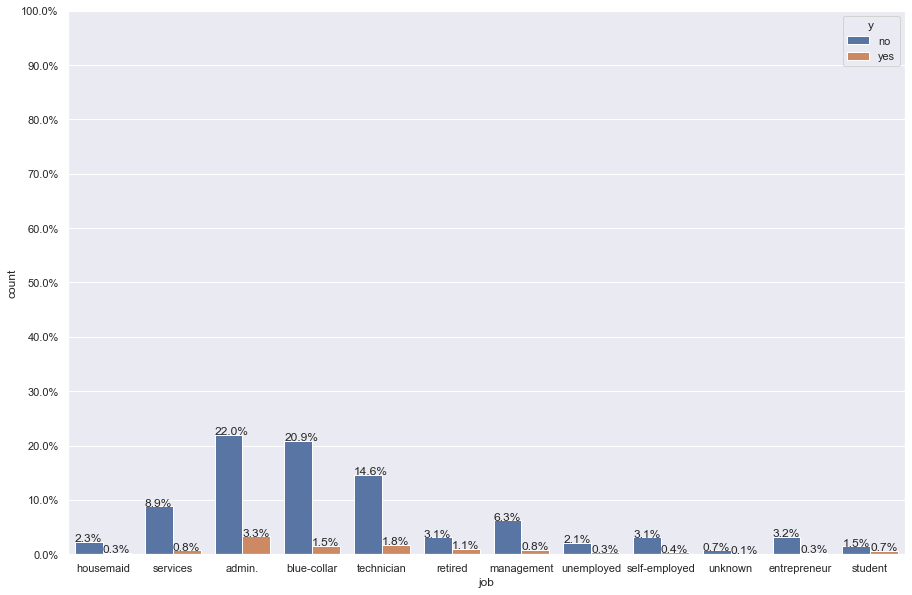

In [12]:
countplot_target_varaible('job','y')

From the above plot, admin and blue-collar customer have the highest conversion numbers, but at a different perspective, it also appears that the conversion ratio is more with Students and retirees (different perspective) which we will analyze later

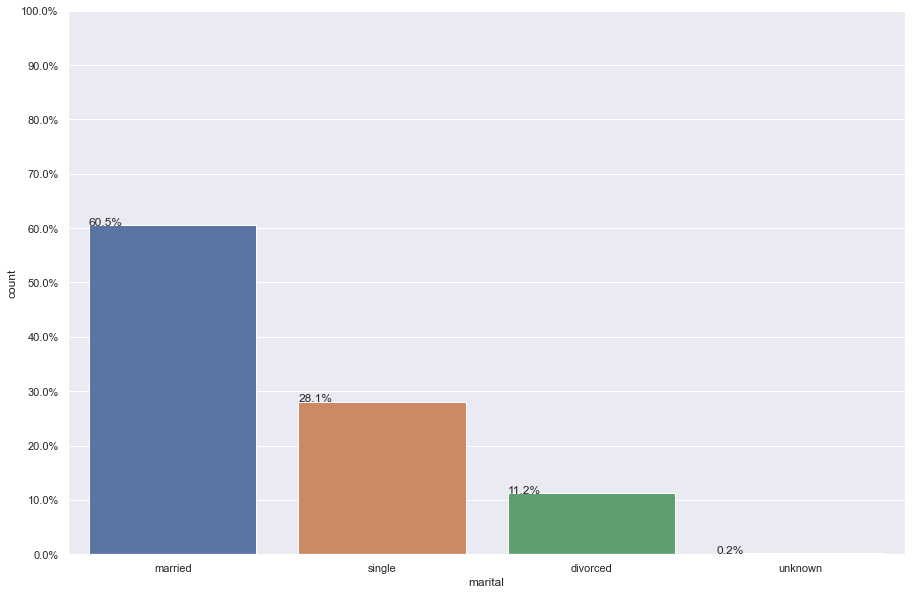

In [13]:
countplot_columns('marital')

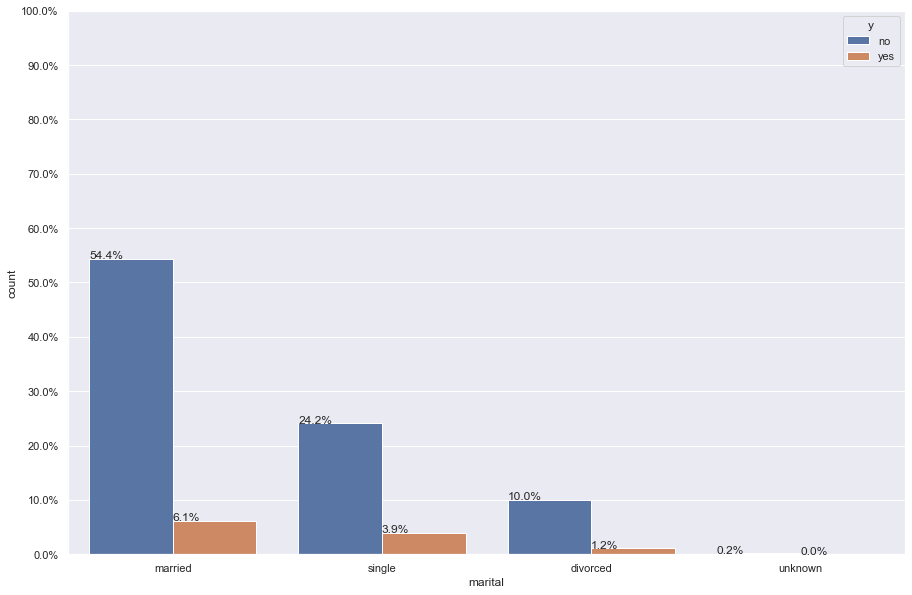

In [14]:
countplot_target_varaible('marital','y')


More evident that married customers were contacted more by the Bank and they are the ones that have subcribed to the product, but on different thought, single customers have the best ratio of conversion. Lets check on more factors on what yielded to these numbers. 

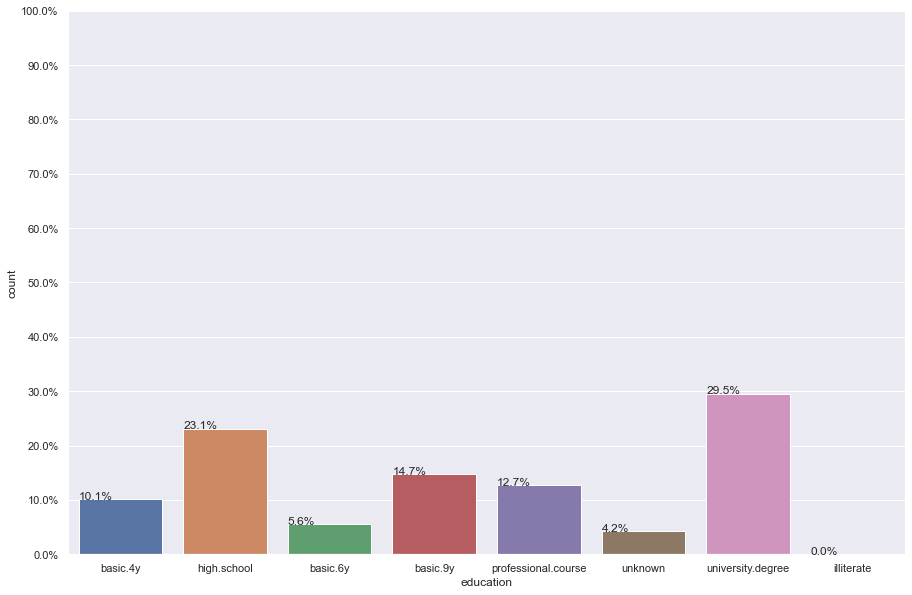

In [15]:
countplot_columns('education')

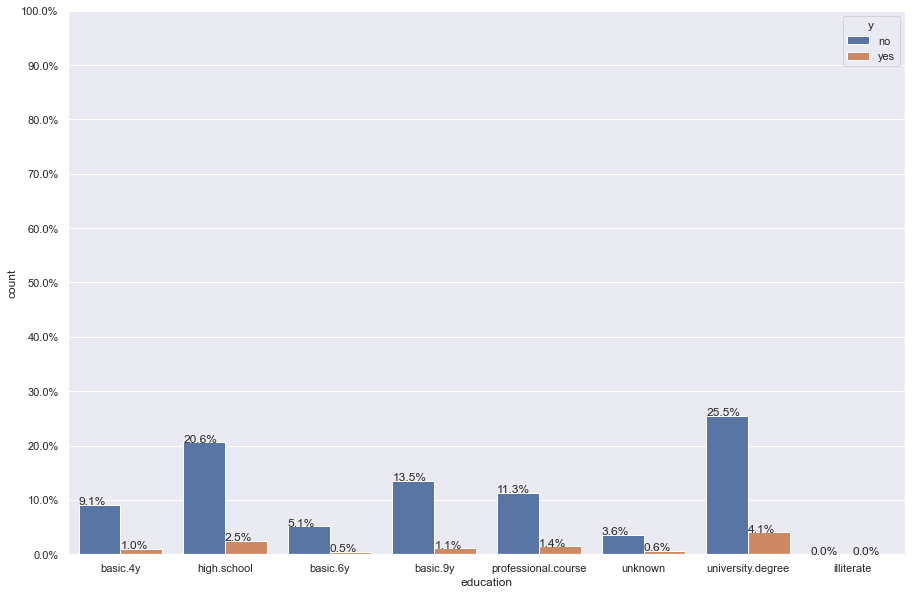

In [16]:
countplot_target_varaible('education','y')

Barplot shows that customers with university degree have the highest numbers both in terms of numbers and percentages. 

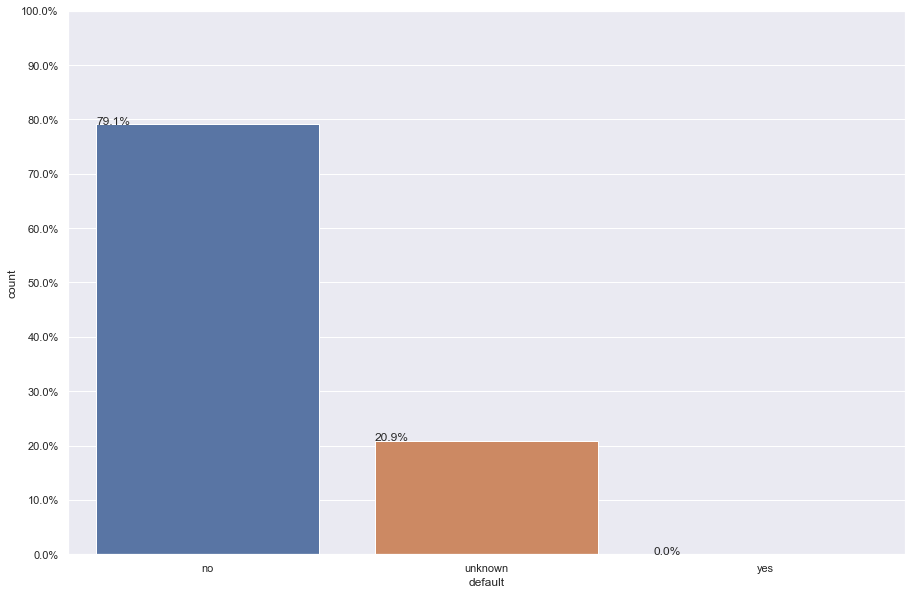

In [17]:
countplot_columns('default')

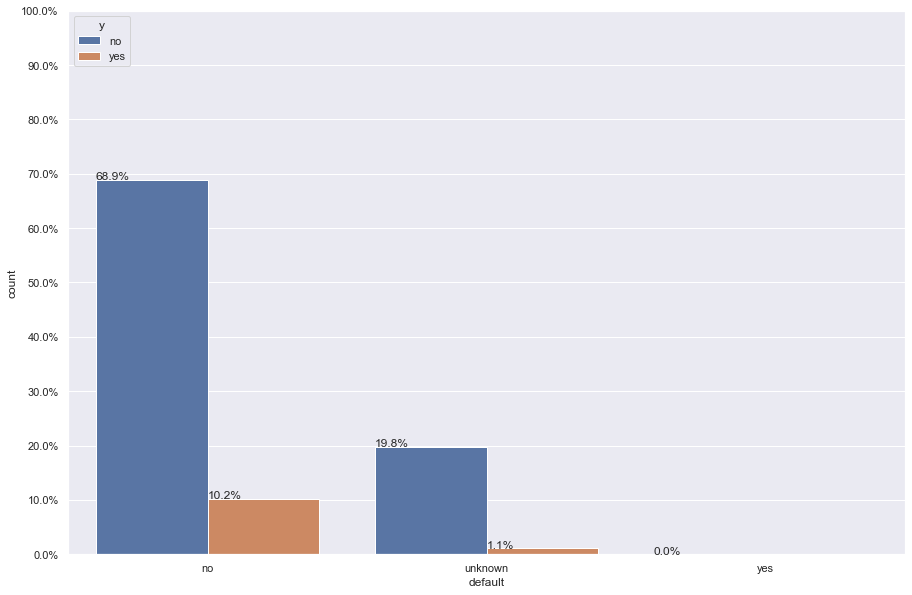

In [18]:
countplot_target_varaible('default','y')

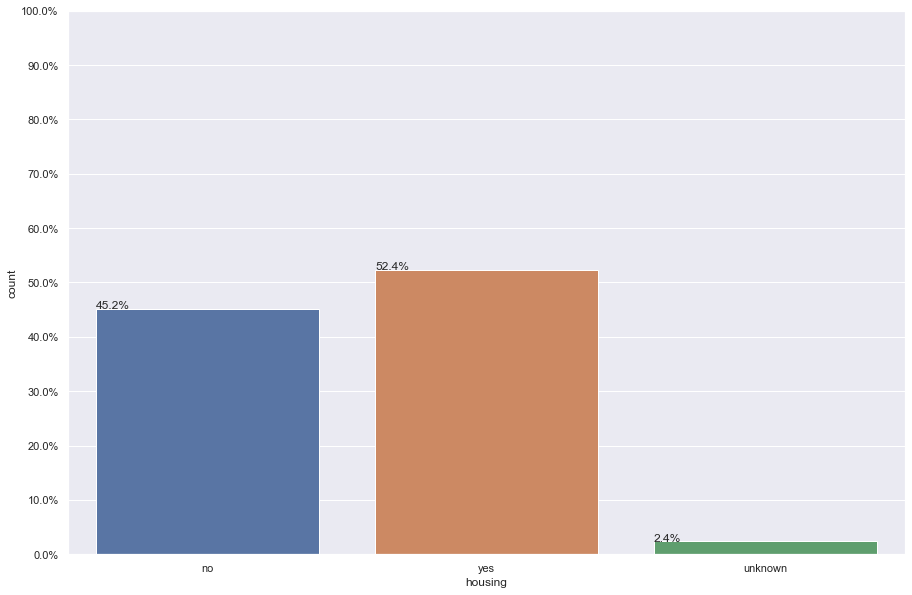

In [19]:
countplot_columns('housing')

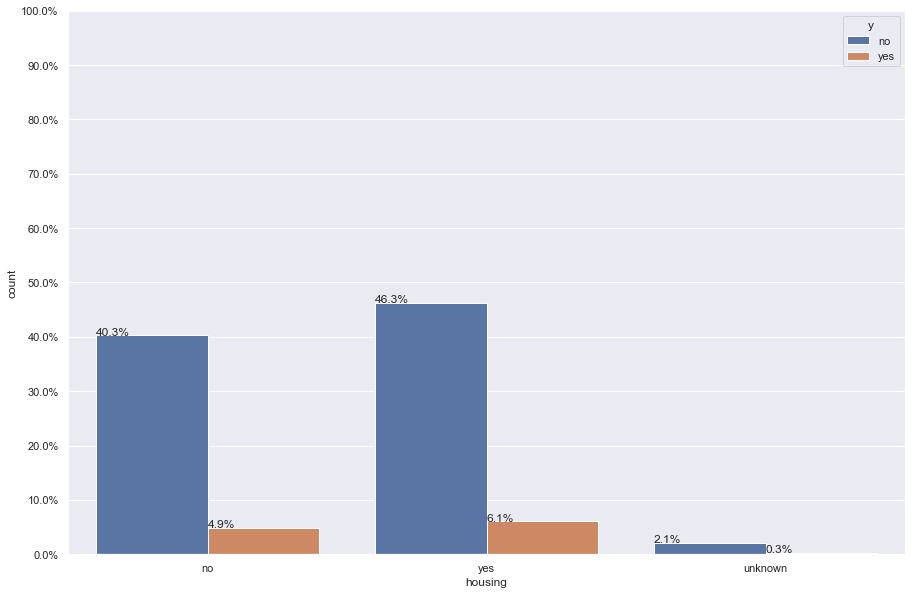

In [20]:
countplot_target_varaible('housing','y')

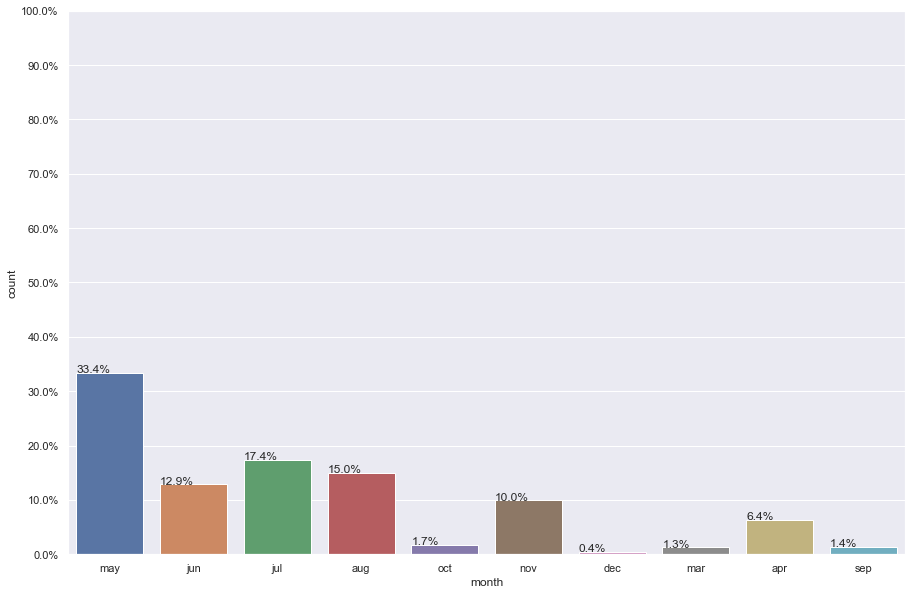

In [21]:
countplot_columns('month')

In [22]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

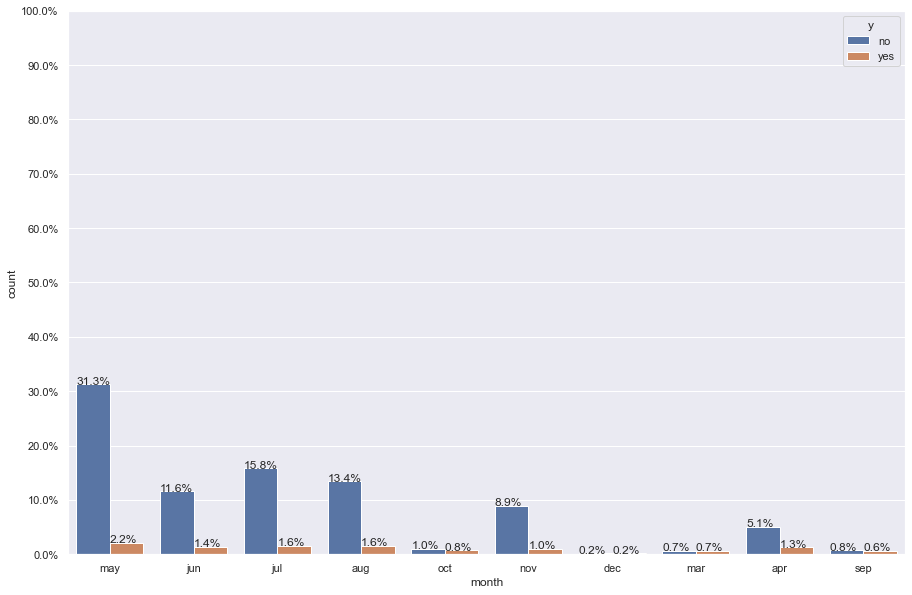

In [23]:
countplot_target_varaible('month','y')

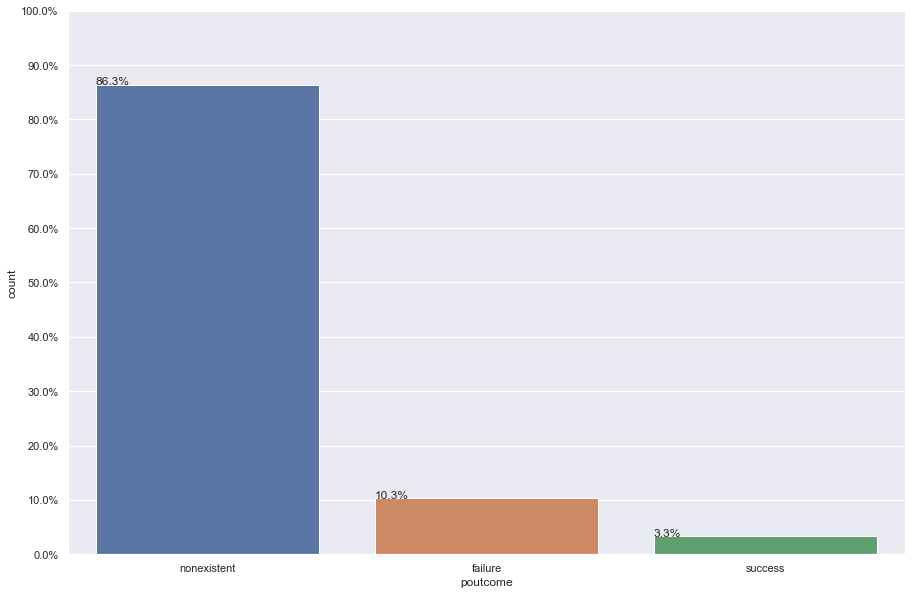

In [24]:
countplot_columns('poutcome')

people with previous outcome as success has subscribed to the product from the current marketing strategy more than people with previous outcome as success who turned down the product from the current marketing strategy.

In [25]:
def plotting_kd(data,columns,hue=None):
    if hue==None:    
       plot=sns.FacetGrid(data,size=10).map(sns.distplot,columns)
    else:
        plot=sns.FacetGrid(data,hue=hue,size=10).map(sns.distplot,columns)
        plt.legend()

In [26]:
def violinplot_columns(columns,y='y'):
    figure(figsize=(15,10))
    sns.violinplot(x=df[y],y=df[columns],hue=df['y'],showfliers=False)
    plt.title(columns.upper())

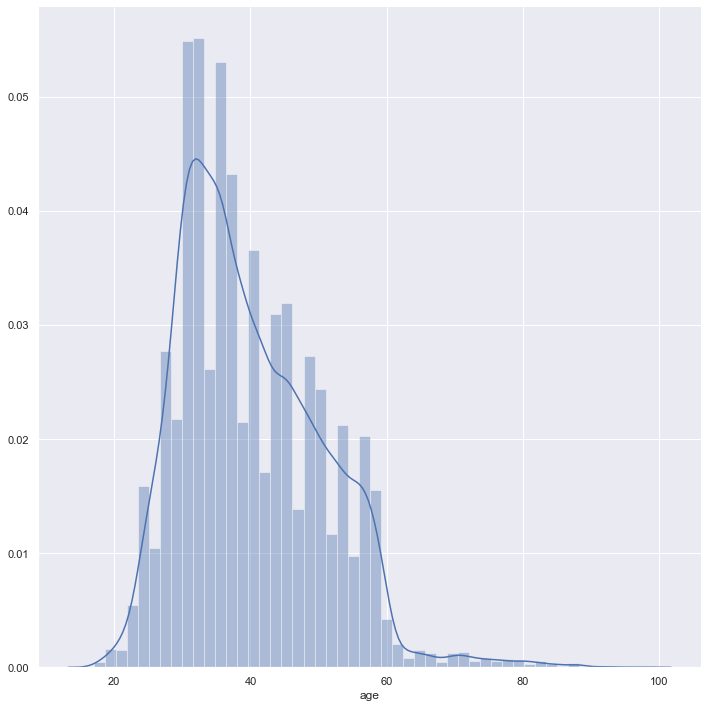

In [27]:
plotting_kd(df,'age')

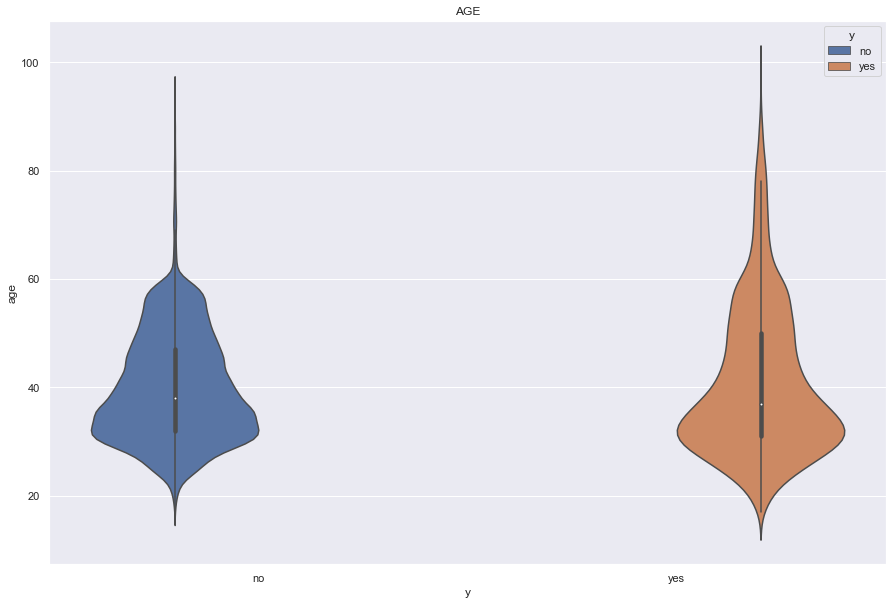

In [28]:
violinplot_columns('age')

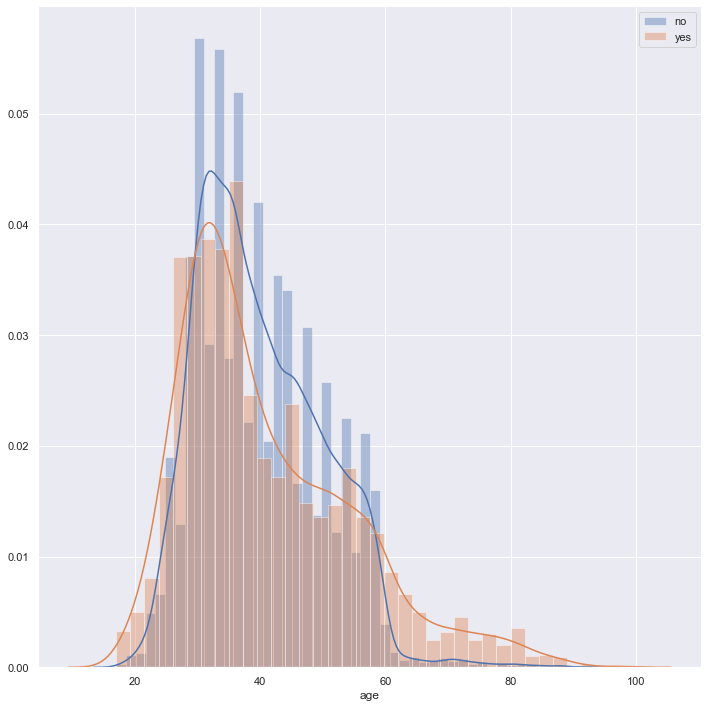

In [29]:
plotting_kd(df,'age',hue='y')

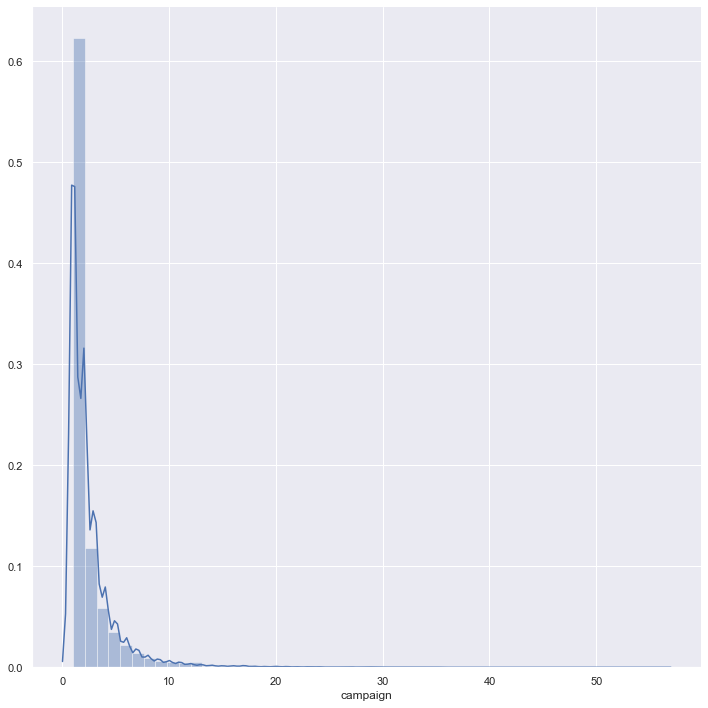

In [30]:
plotting_kd(df,'campaign')

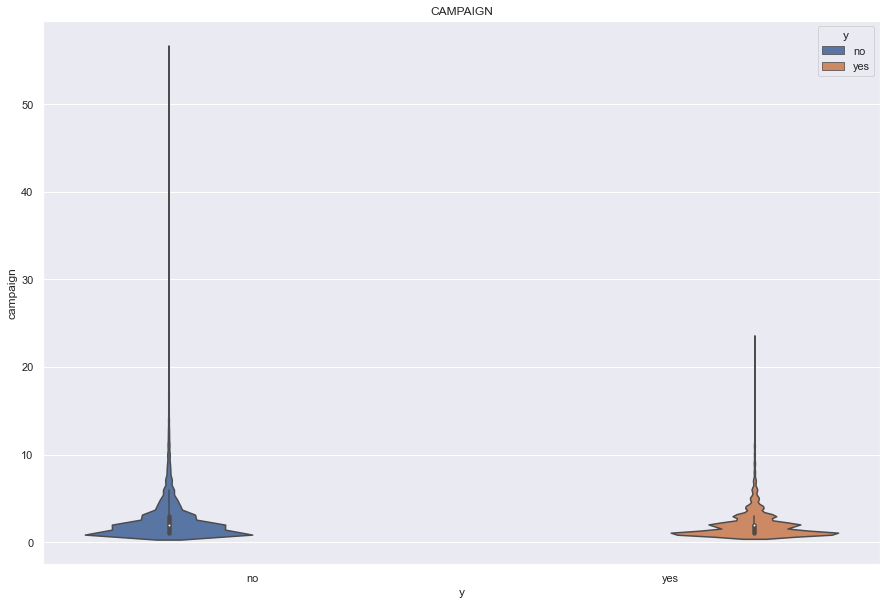

In [31]:
violinplot_columns('campaign')

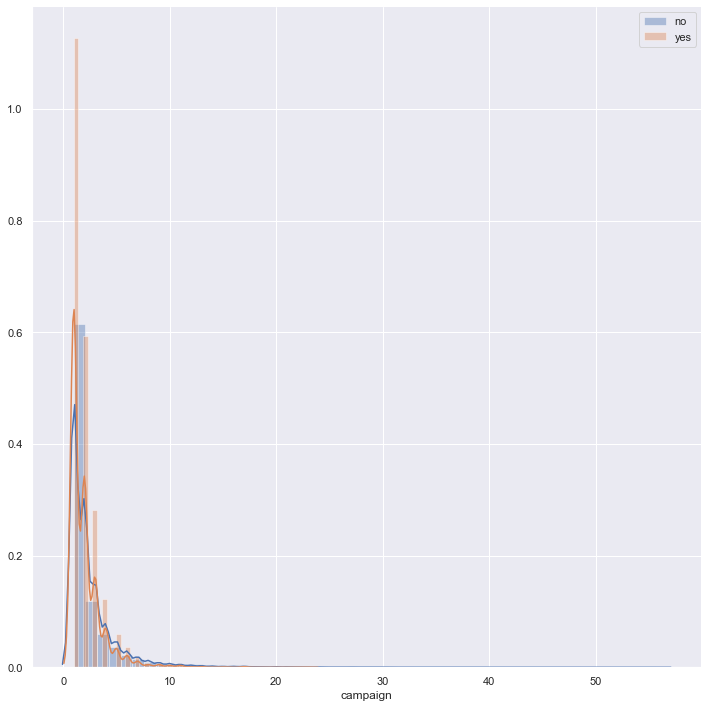

In [32]:
plotting_kd(df,'campaign',hue='y')

In [33]:
df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

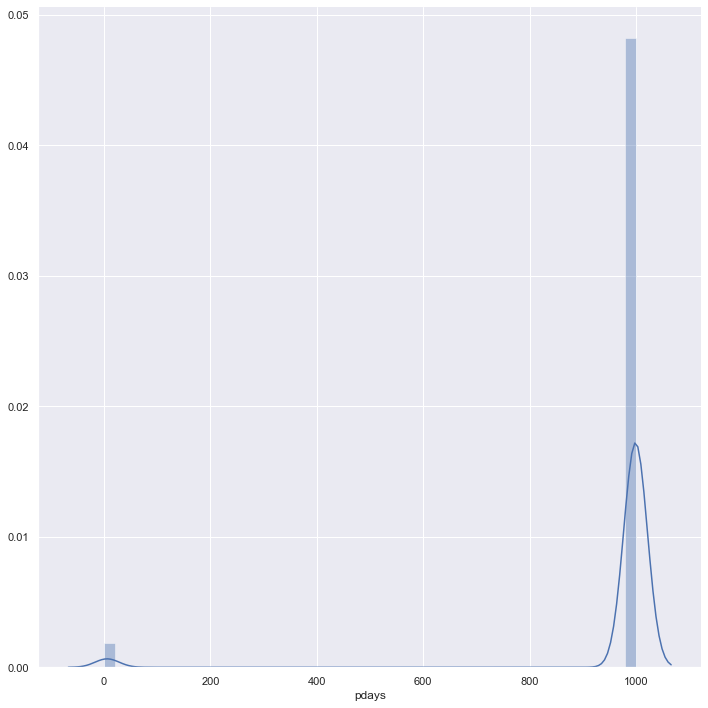

In [34]:
plotting_kd(df,'pdays')

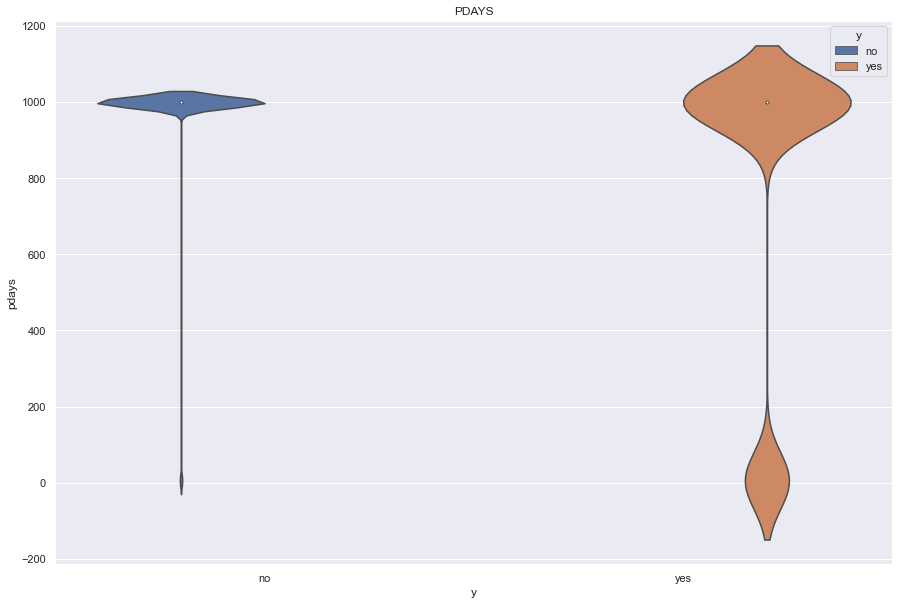

In [35]:
violinplot_columns('pdays')

In [36]:
percentile=[0,25,50,75,99]
for values in percentile:
    print("Percentile values",values)
    print("For yes class")
    print(np.percentile(df[df['y']=='yes'].pdays,values))
    
    print("For No Class")
    print(np.percentile(df[df['y']=='no'].pdays,values))
    print()

Percentile values 0
For yes class
0.0
For No Class
0.0

Percentile values 25
For yes class
999.0
For No Class
999.0

Percentile values 50
For yes class
999.0
For No Class
999.0

Percentile values 75
For yes class
999.0
For No Class
999.0

Percentile values 99
For yes class
999.0
For No Class
999.0



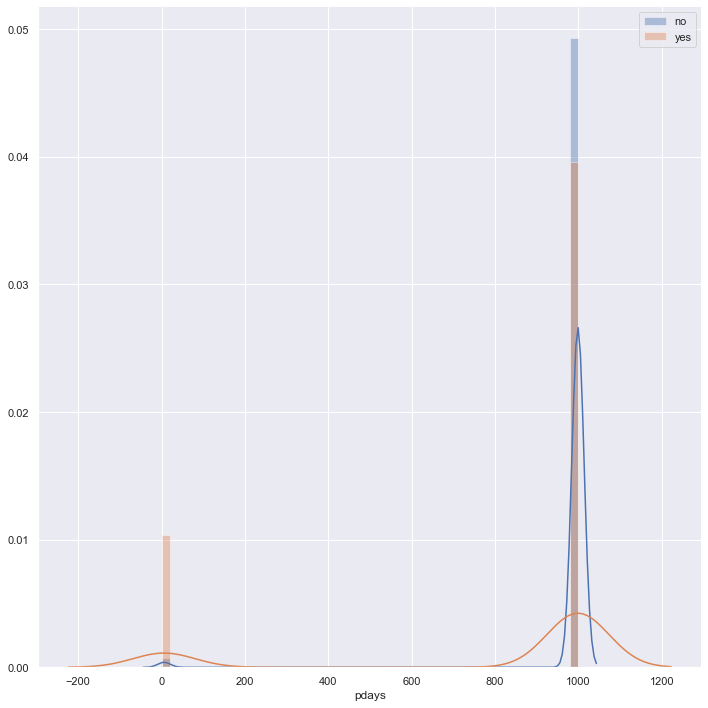

In [37]:
plotting_kd(df,'pdays',hue='y')

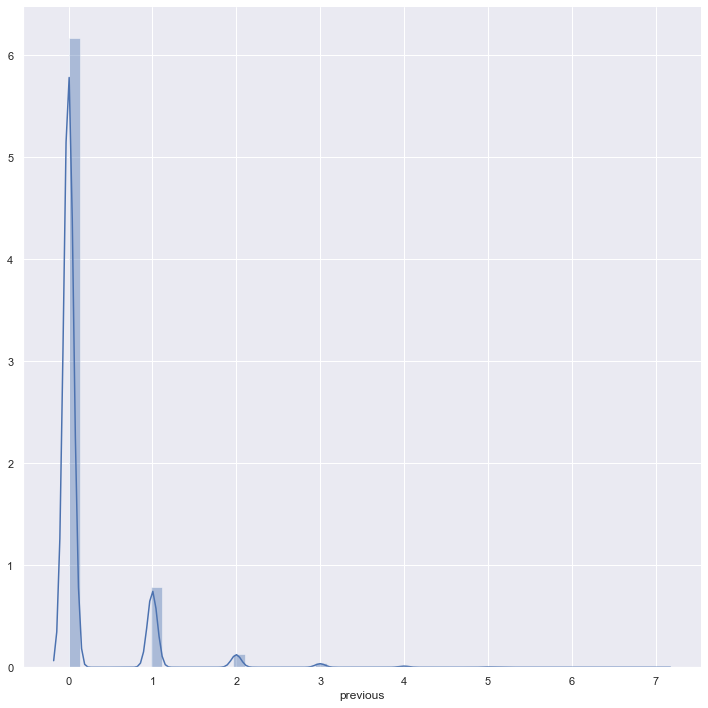

In [38]:
plotting_kd(df,'previous')

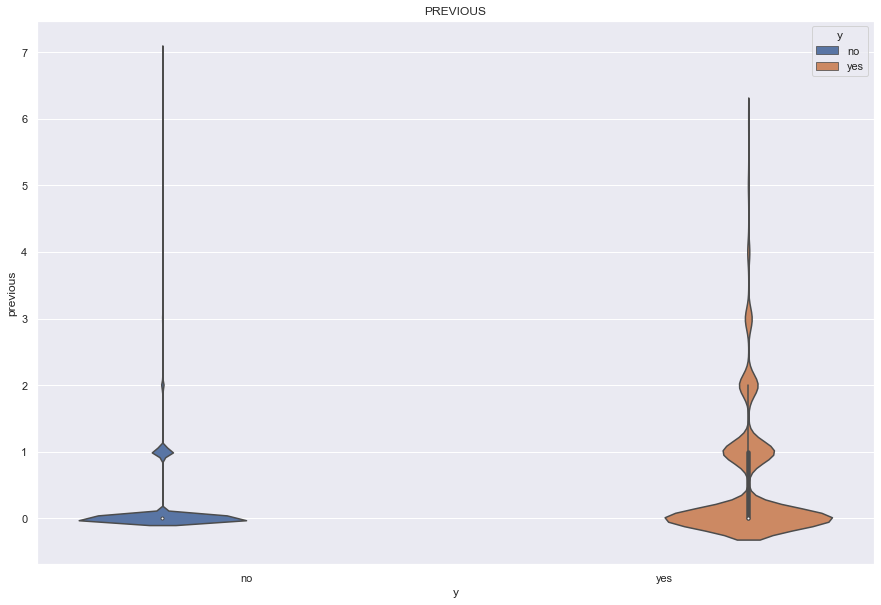

In [39]:
violinplot_columns('previous')

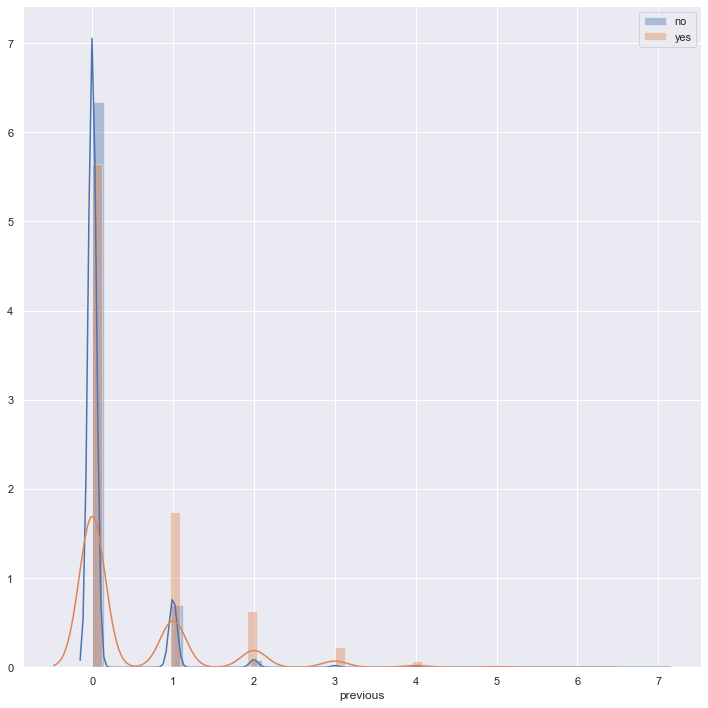

In [40]:
plotting_kd(df,'previous',hue='y')

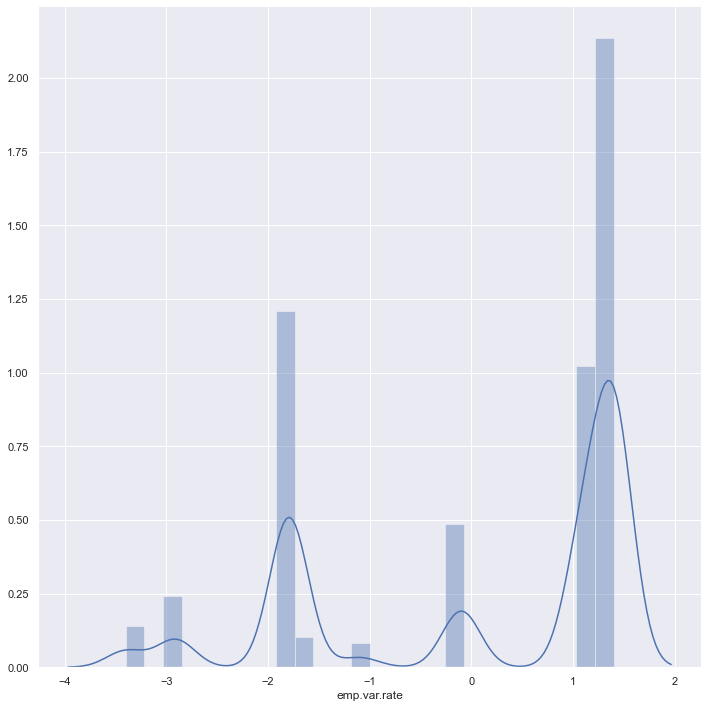

In [41]:
plotting_kd(df,'emp.var.rate')

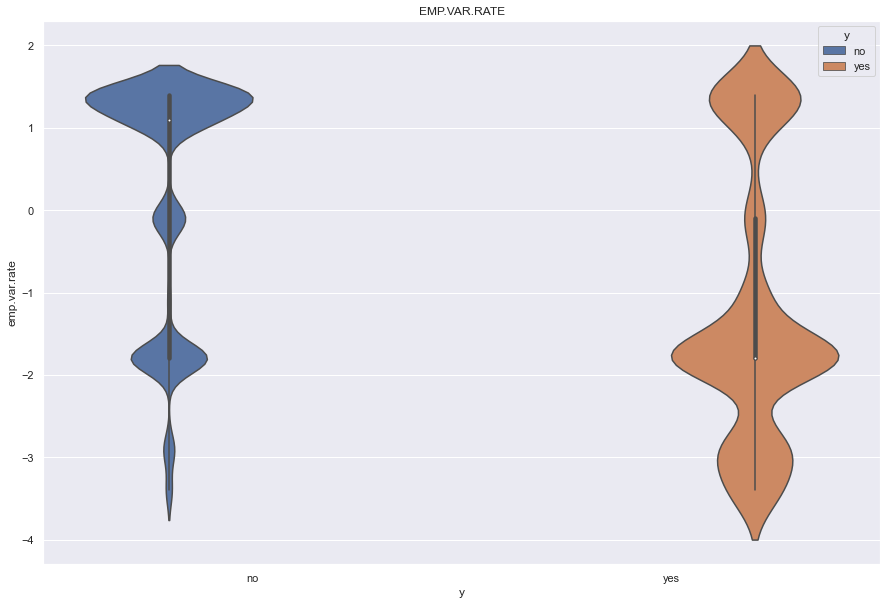

In [42]:
violinplot_columns('emp.var.rate')

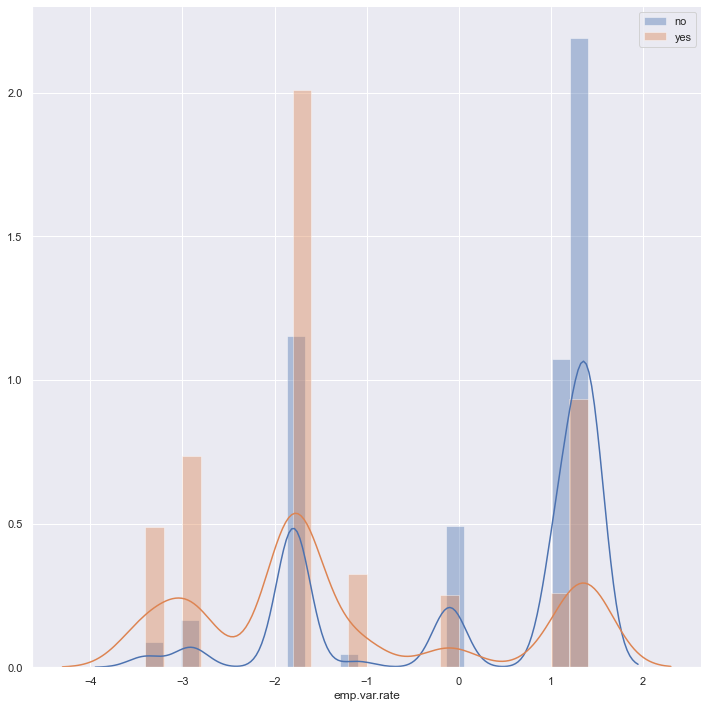

In [43]:
plotting_kd(df,'emp.var.rate',hue='y')

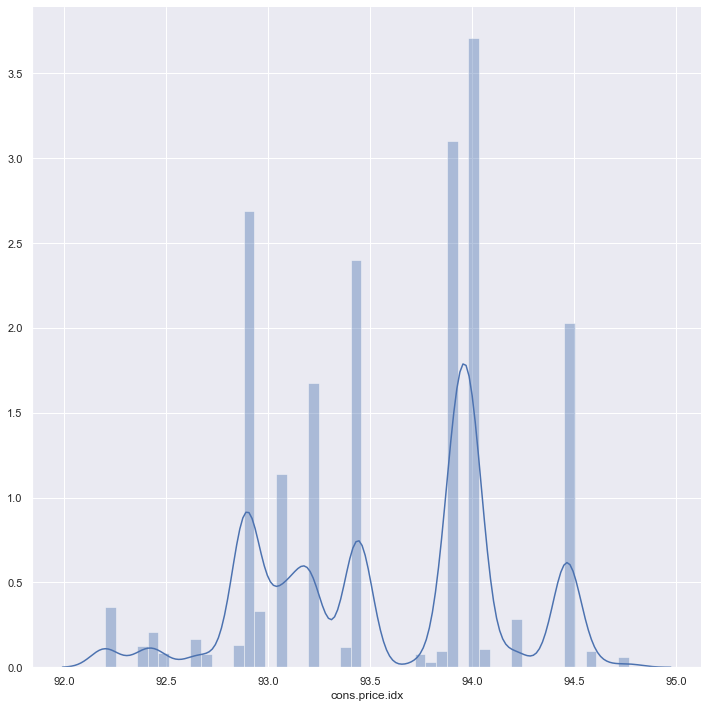

In [44]:
plotting_kd(df,'cons.price.idx')

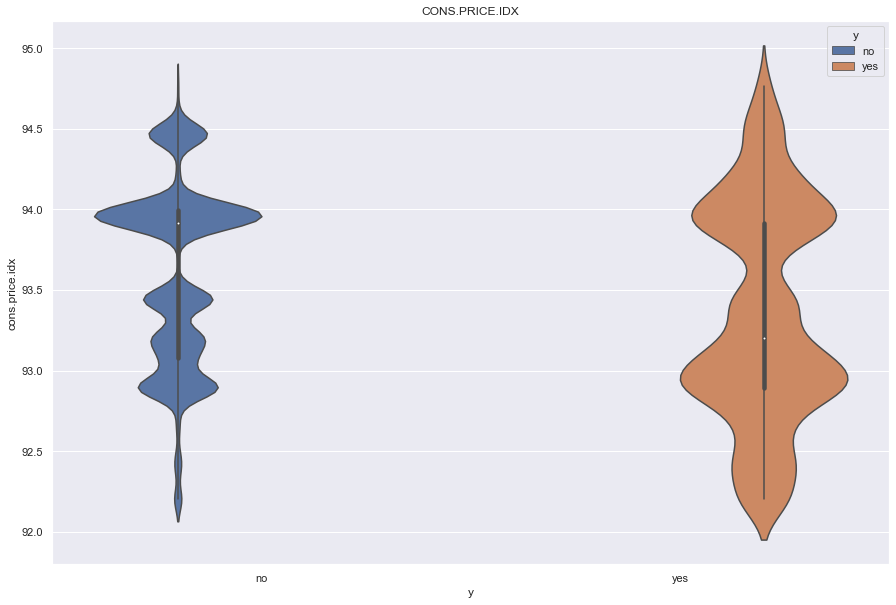

In [45]:
violinplot_columns('cons.price.idx')

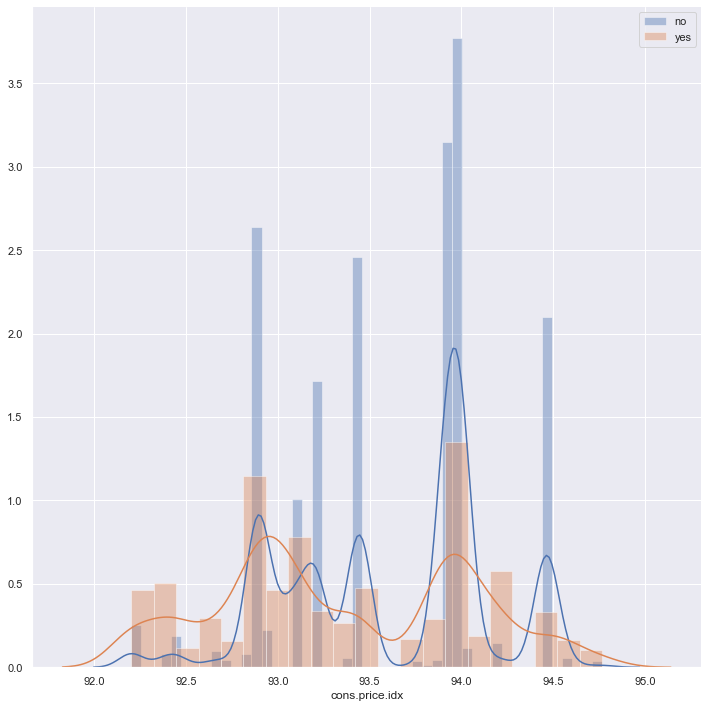

In [46]:
plotting_kd(df,'cons.price.idx',hue='y')

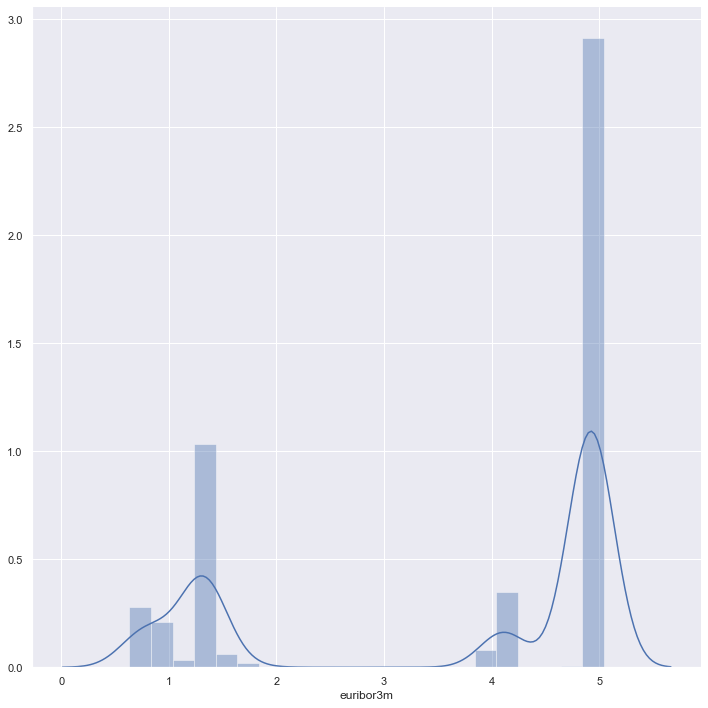

In [47]:
plotting_kd(df,'euribor3m')

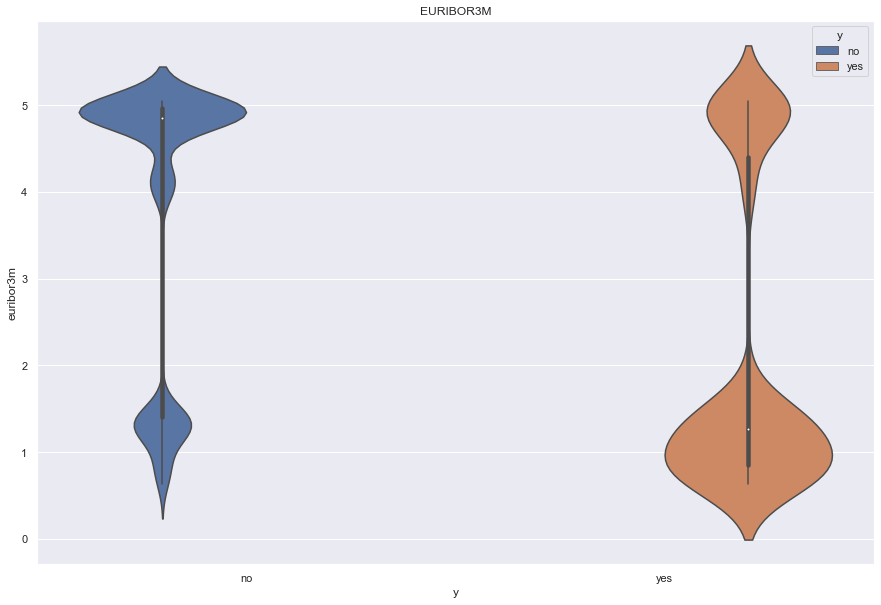

In [48]:
violinplot_columns('euribor3m')

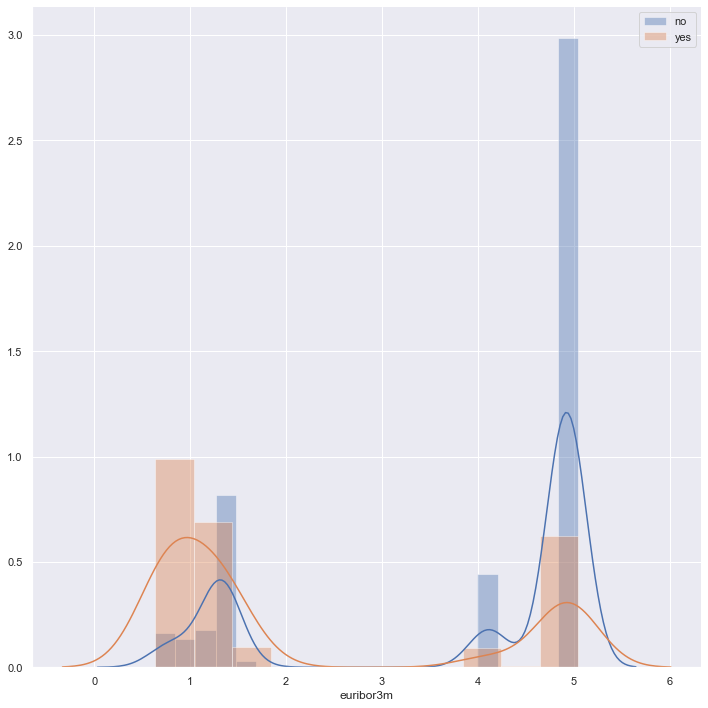

In [49]:
plotting_kd(df,'euribor3m',hue='y')

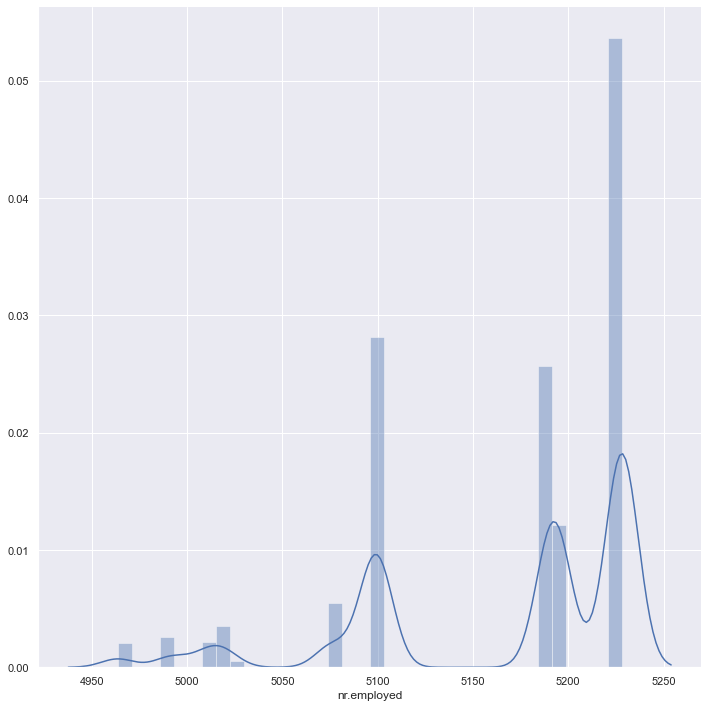

In [50]:
plotting_kd(df,'nr.employed')

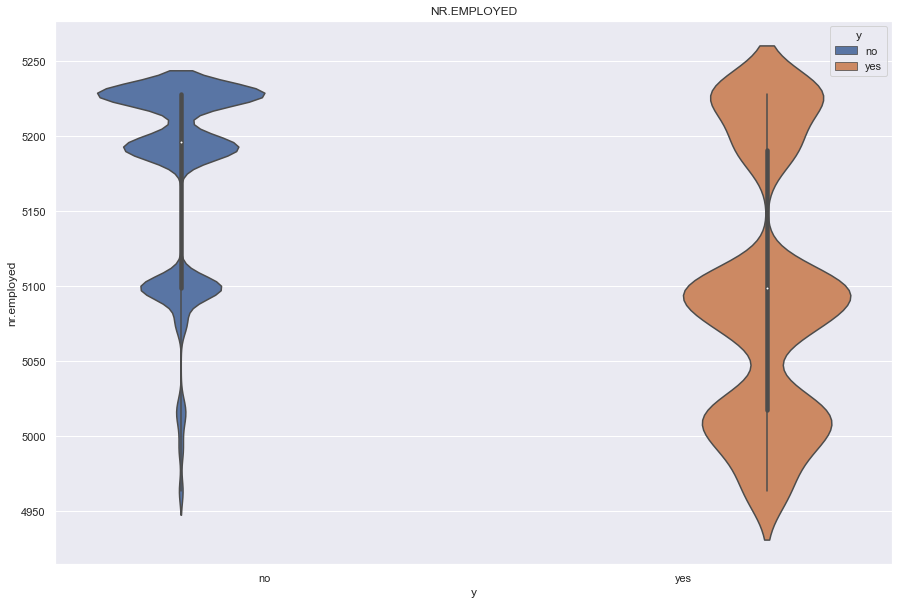

In [51]:
violinplot_columns('nr.employed')

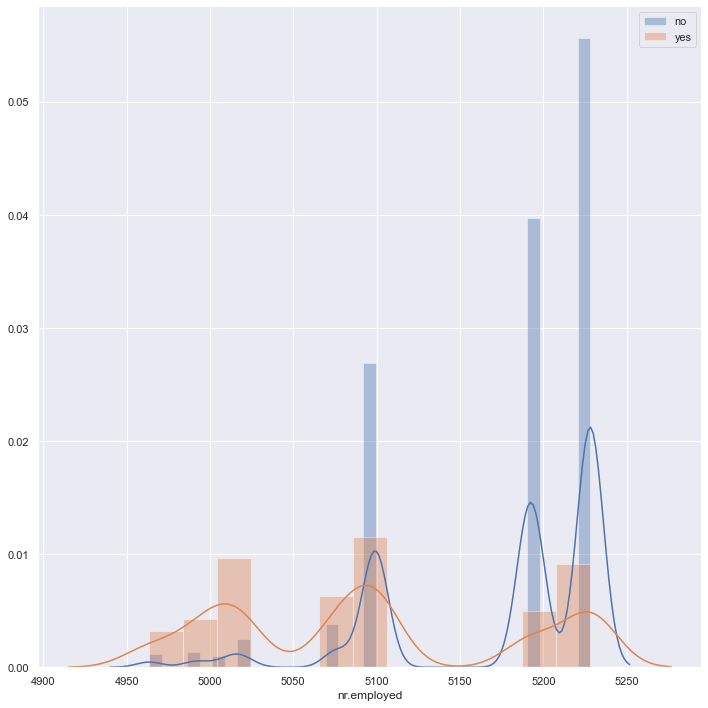

In [52]:
plotting_kd(df,'nr.employed',hue='y')

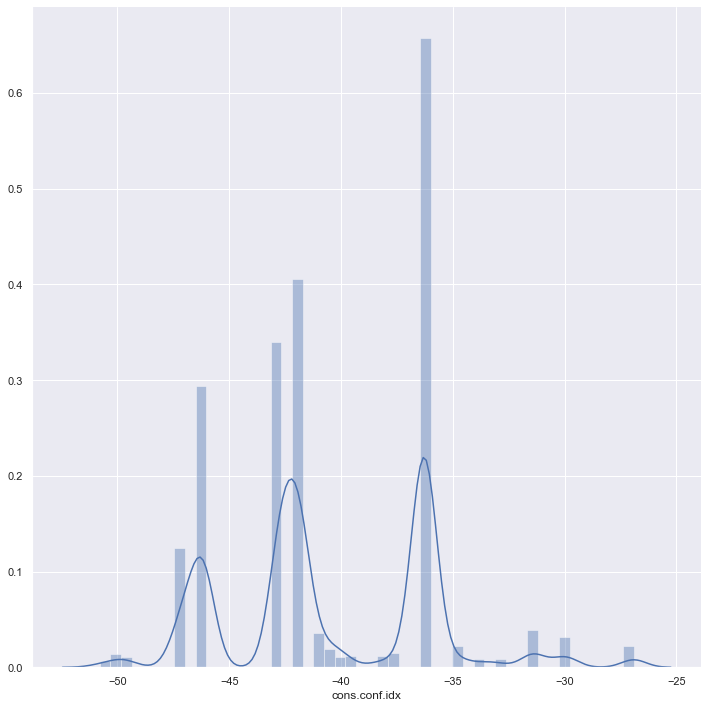

In [53]:
plotting_kd(df,'cons.conf.idx')

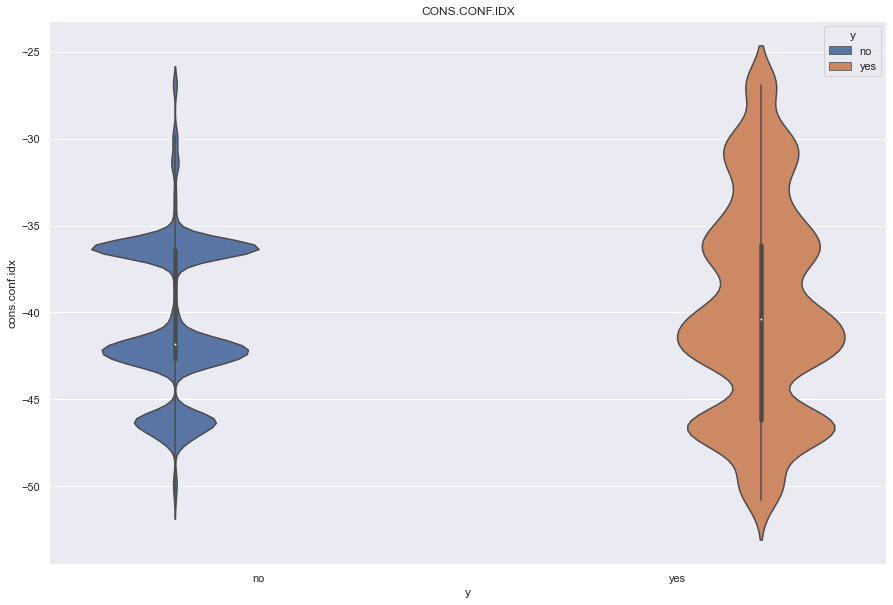

In [54]:
violinplot_columns('cons.conf.idx')

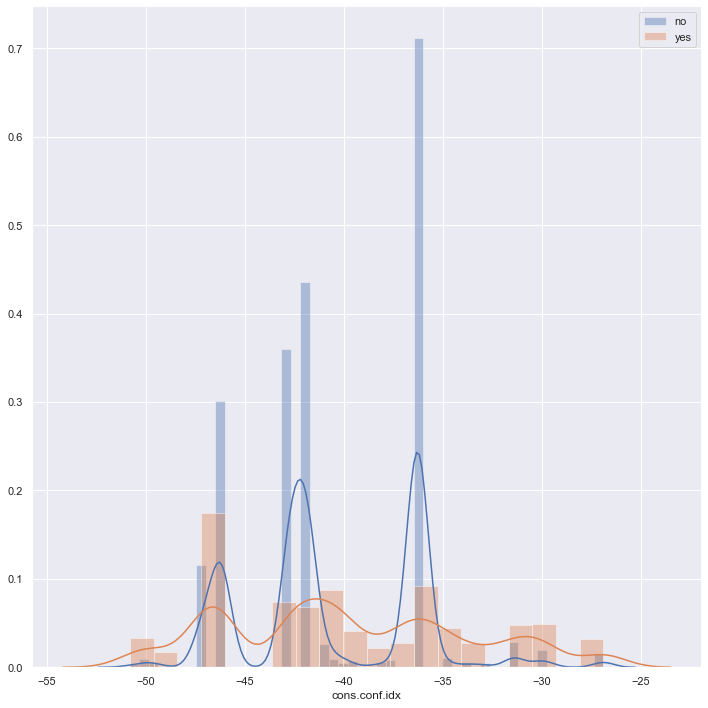

In [55]:
plotting_kd(df,'cons.conf.idx',hue='y')

Correlation Matrix

In [56]:
def plotting_heatmap(data):
    correlation=data.corr()
    figure(figsize=(15,10))
        
        
    sns.heatmap(correlation, annot=True)
    plt.show()

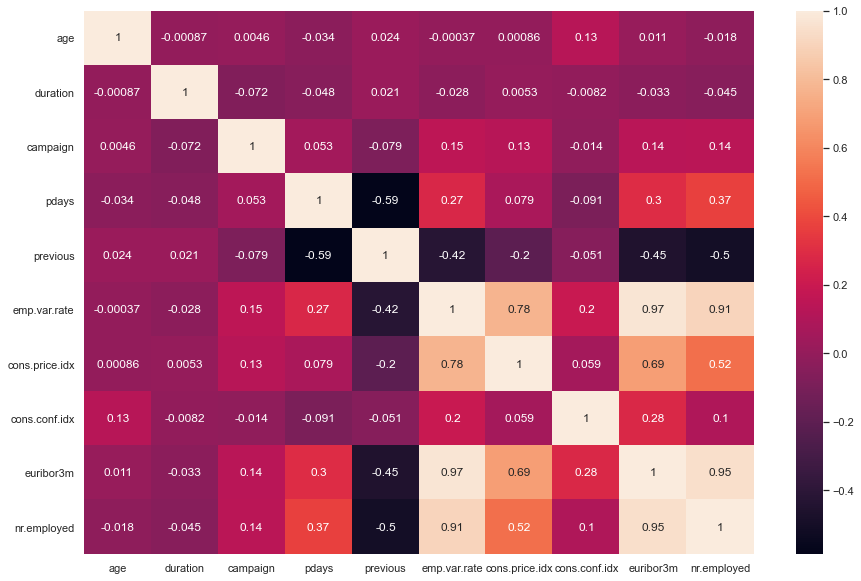

In [57]:
plotting_heatmap(df)

In [58]:
def plotting_violinplot(column1,column2):
    figure(figsize=(15,10))
    sns.violinplot(x=df[column1],y=df[column2],hue=df['y'],showfliers=False)
    plt.show()

In [59]:
def plotting_catplot(column1,column2,height=10):
    sns.catplot(x=column1, col=column2,hue='y',col_wrap=2,data=df,kind="count", height=height, aspect=.8)

Converting Age into categorical data

In [60]:
#Reference https://www.absentdata.com/pandas/pandas-cut-continuous-to-categorical/

def age_to_categorical(data1,age):
    age_group=pd.cut(age,bins=[10,20,30,40,50,60,70,80,90,100],labels=['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100'])
    #inserting the age group after age and deleting it
    data1.insert(1,'age_group',age_group)
    #dropping age column
    data1.drop('age',axis=1,inplace=True)
    
    return data1
df=age_to_categorical(df,df.age)   

In [61]:
#creating i_loan based on the columns['loan','housing'] status we have 3 status yes,no, unknown and if any 2 columns have status yes then
#i_loan will have yes as status, if none of them have yes as status but no as status then i_loan will have no status else unknown status.
#dropped the housing,loan column and added i_loan column. 
def creating_i_loan(data2):
    i_loan=[]
    for index in range(len(data2)):
        if (data2['housing'].loc[index]=='yes' or data2['loan'].loc[index]=='yes'):
            i_loan.append('yes')
        elif (data2['housing'].loc[index]=='no' or data2['loan'].loc[index]=='no'):
            i_loan.append('no')
        
        else:
            i_loan.append('unknown')
    data2.insert(5,'i_loan',i_loan,True)   
    data2.drop(['loan','housing'],axis=1,inplace=True)
    return data2           
df=creating_i_loan(df)

In [62]:
df.tail()

,age_group,job,marital,education,default,i_loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,70-79,retired,married,professional.course,no,yes,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,40-49,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,50-59,retired,married,university.degree,no,yes,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,40-49,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,70-79,retired,married,professional.course,no,yes,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


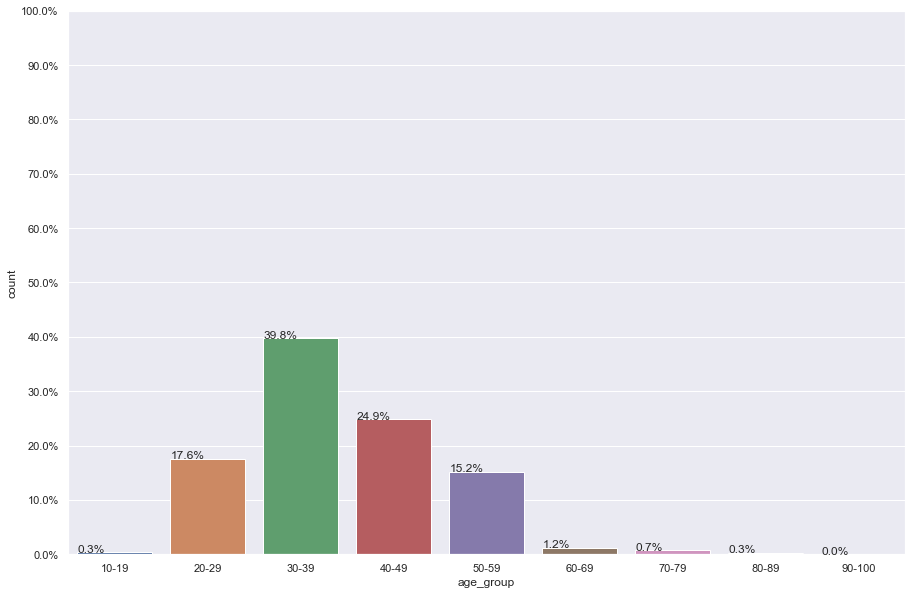

In [63]:
countplot_columns('age_group')

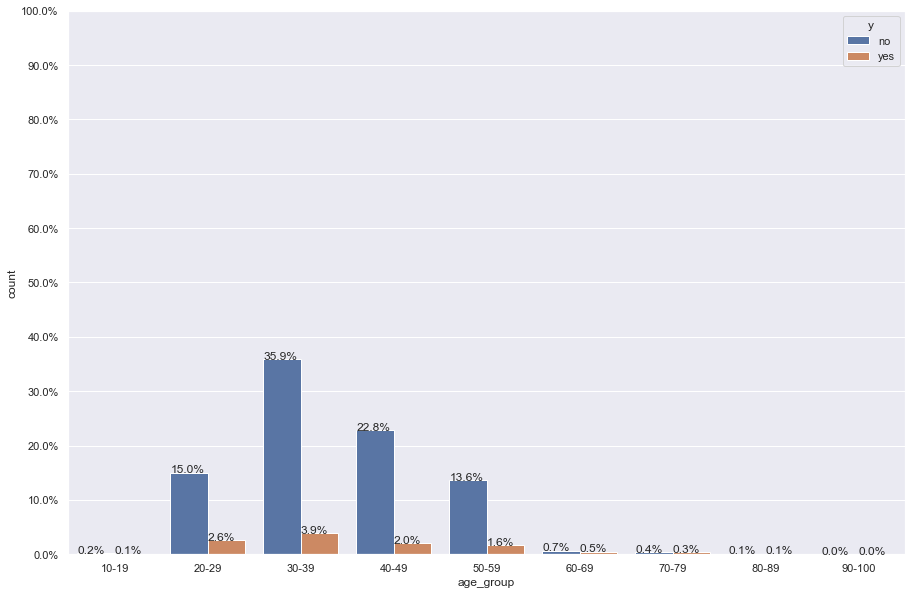

In [64]:
countplot_target_varaible('age_group','y')

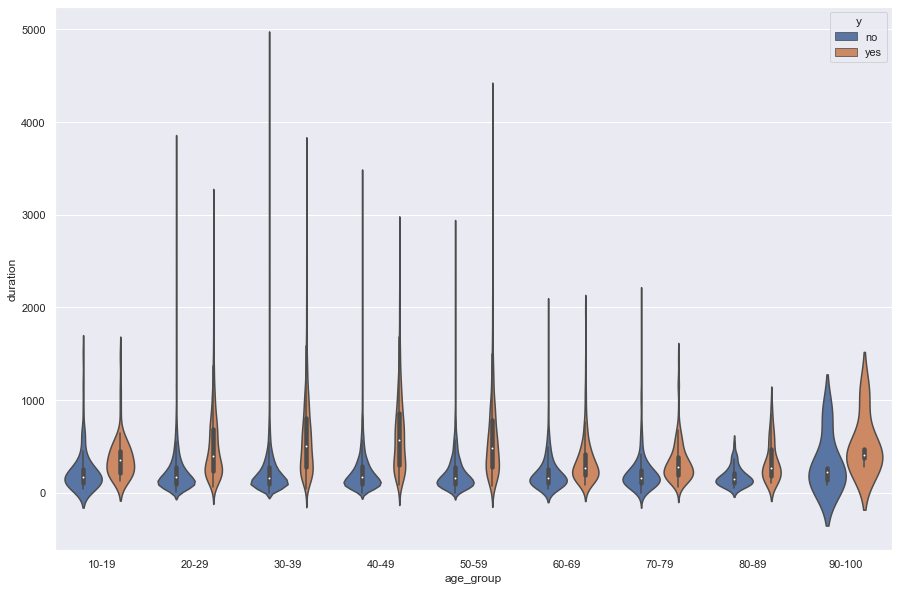

In [65]:
plotting_violinplot('age_group','duration')

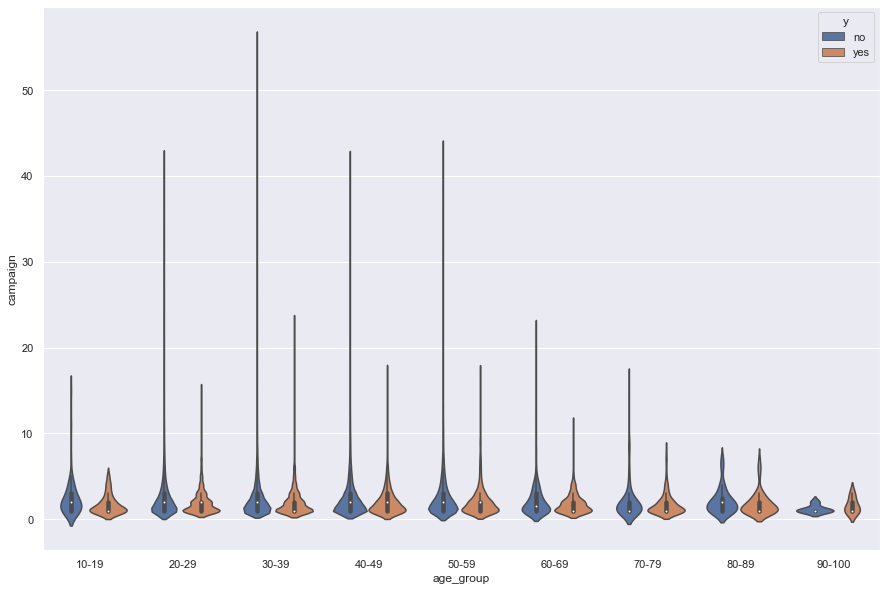

In [66]:
plotting_violinplot('age_group','campaign')

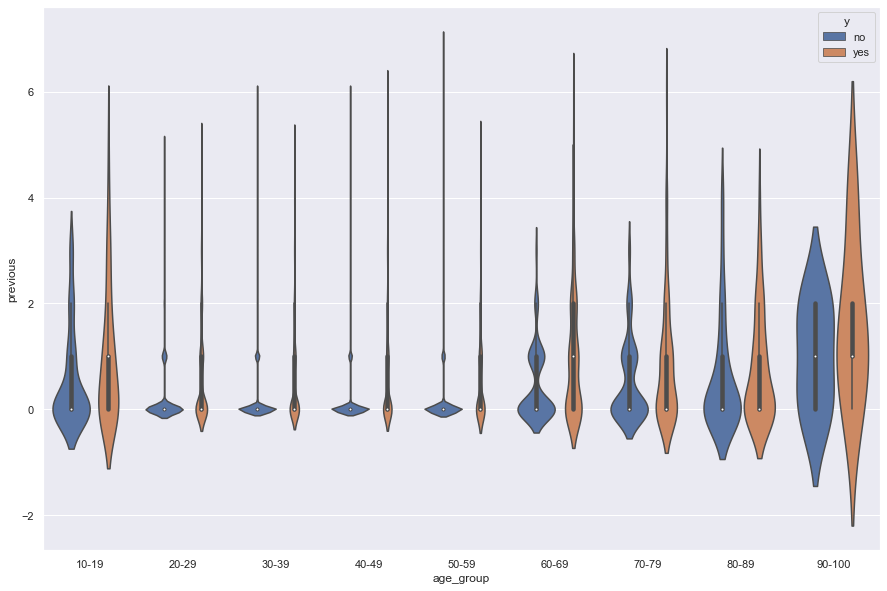

In [67]:
plotting_violinplot('age_group','previous')

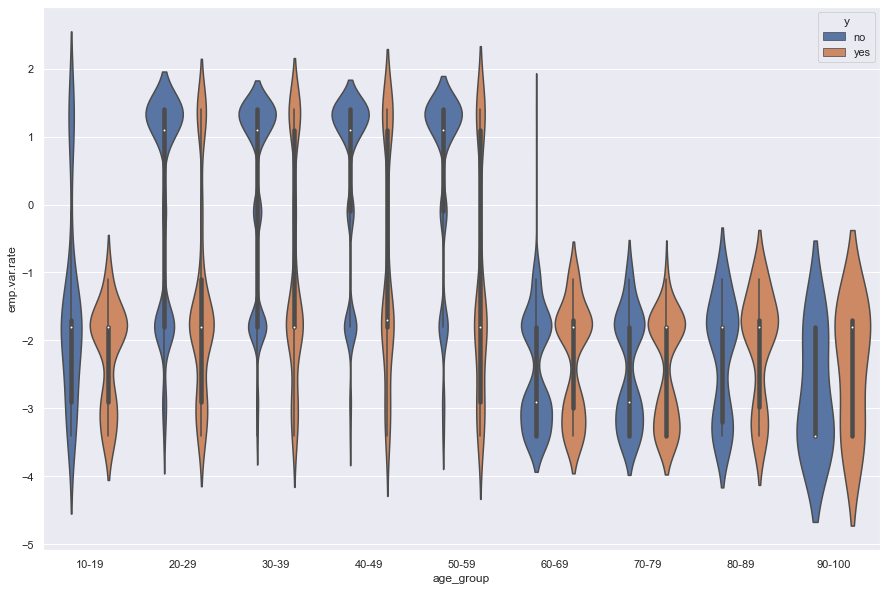

In [68]:
plotting_violinplot('age_group','emp.var.rate')

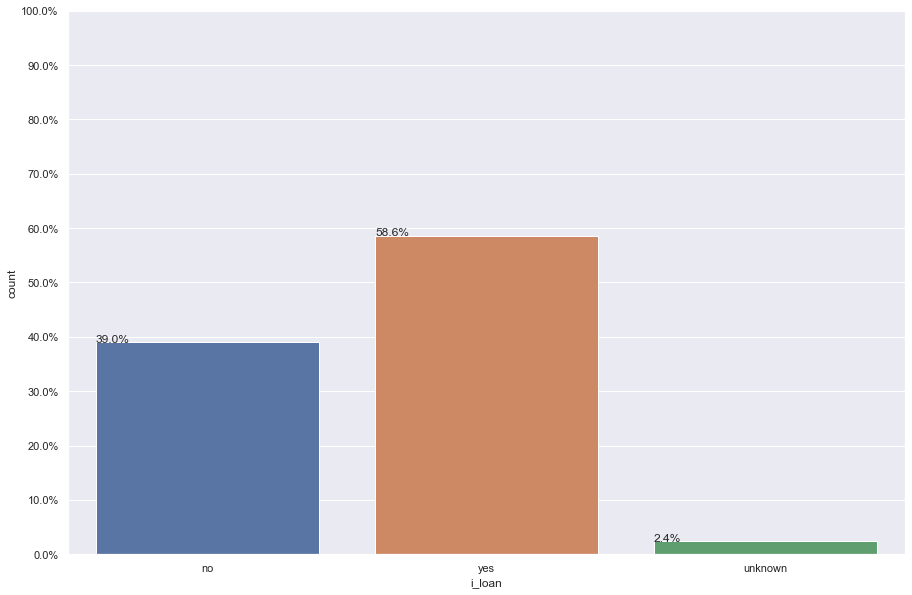

In [69]:
countplot_columns('i_loan')

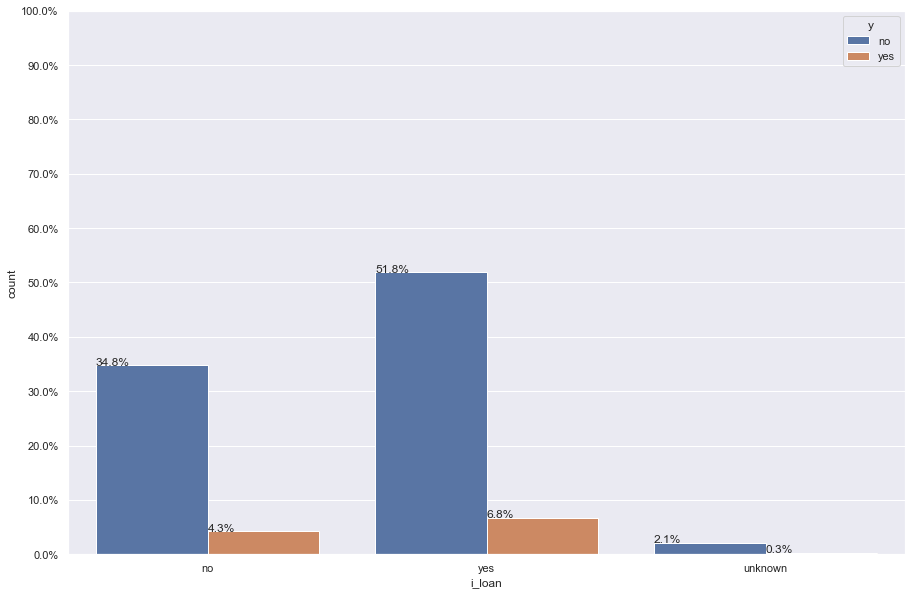

In [70]:
countplot_target_varaible('i_loan','y')

Age Group and Job

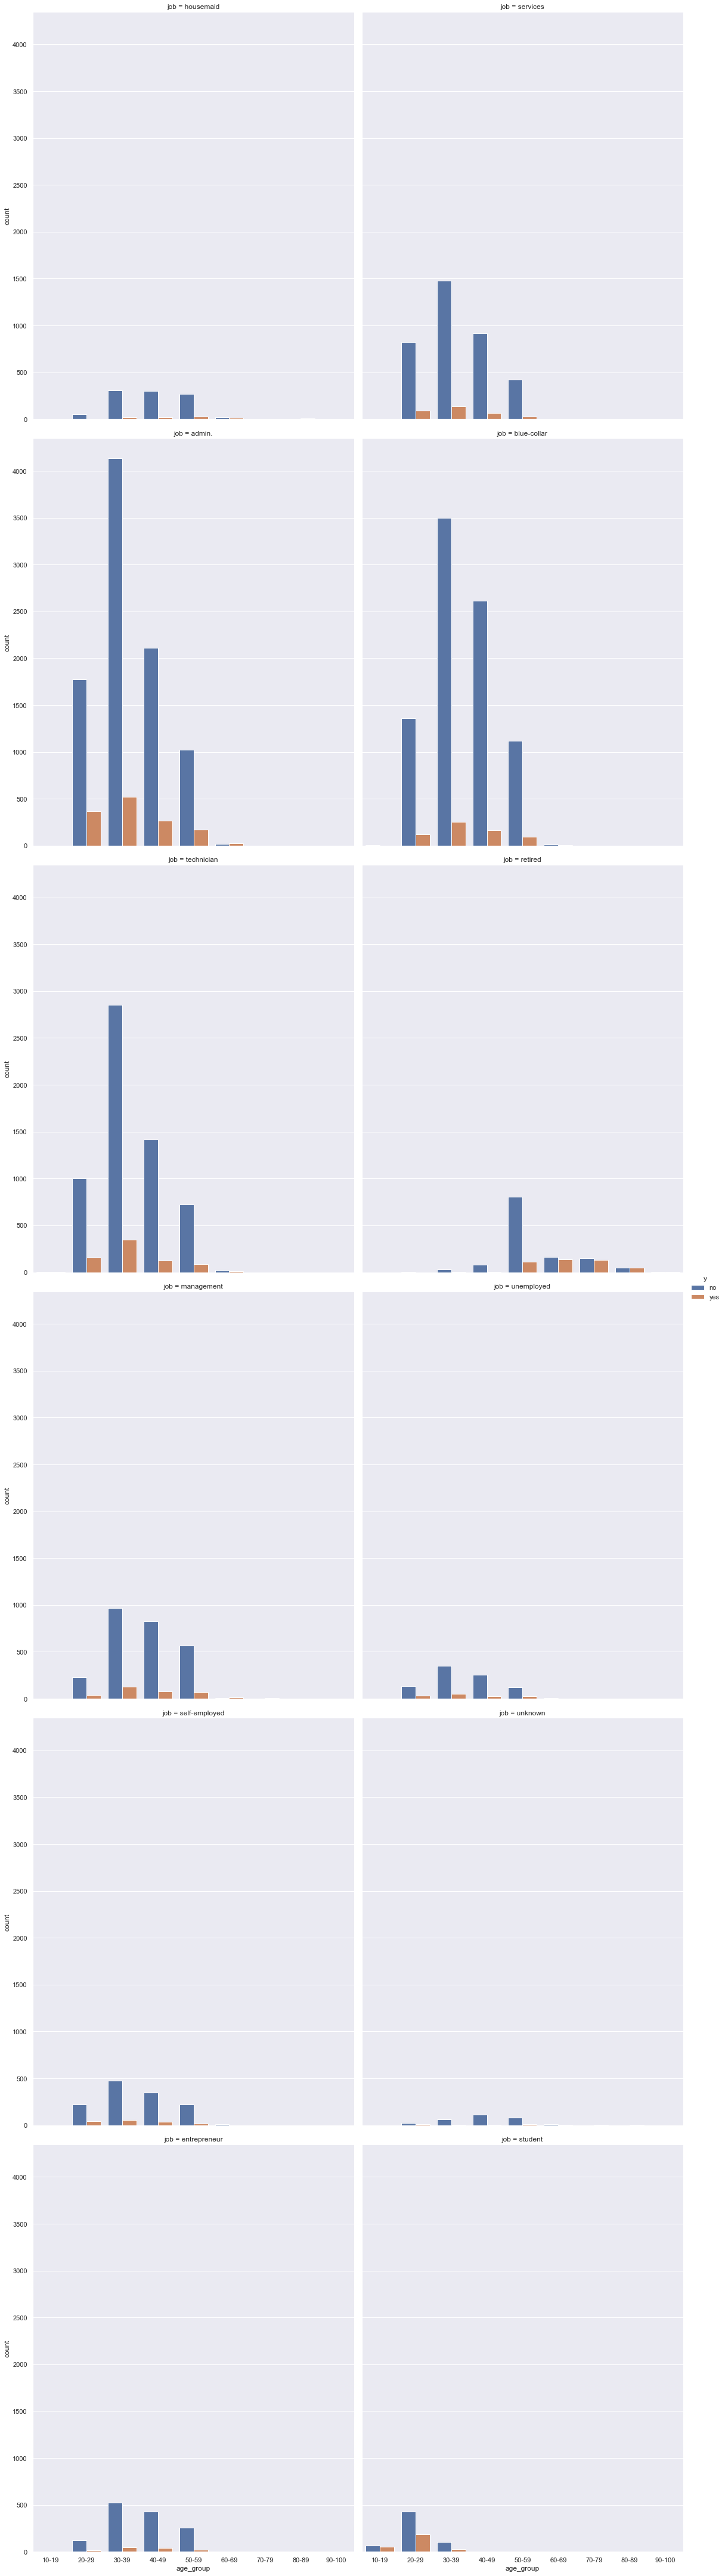

In [71]:
plotting_catplot('age_group','job')

Age Group and Education

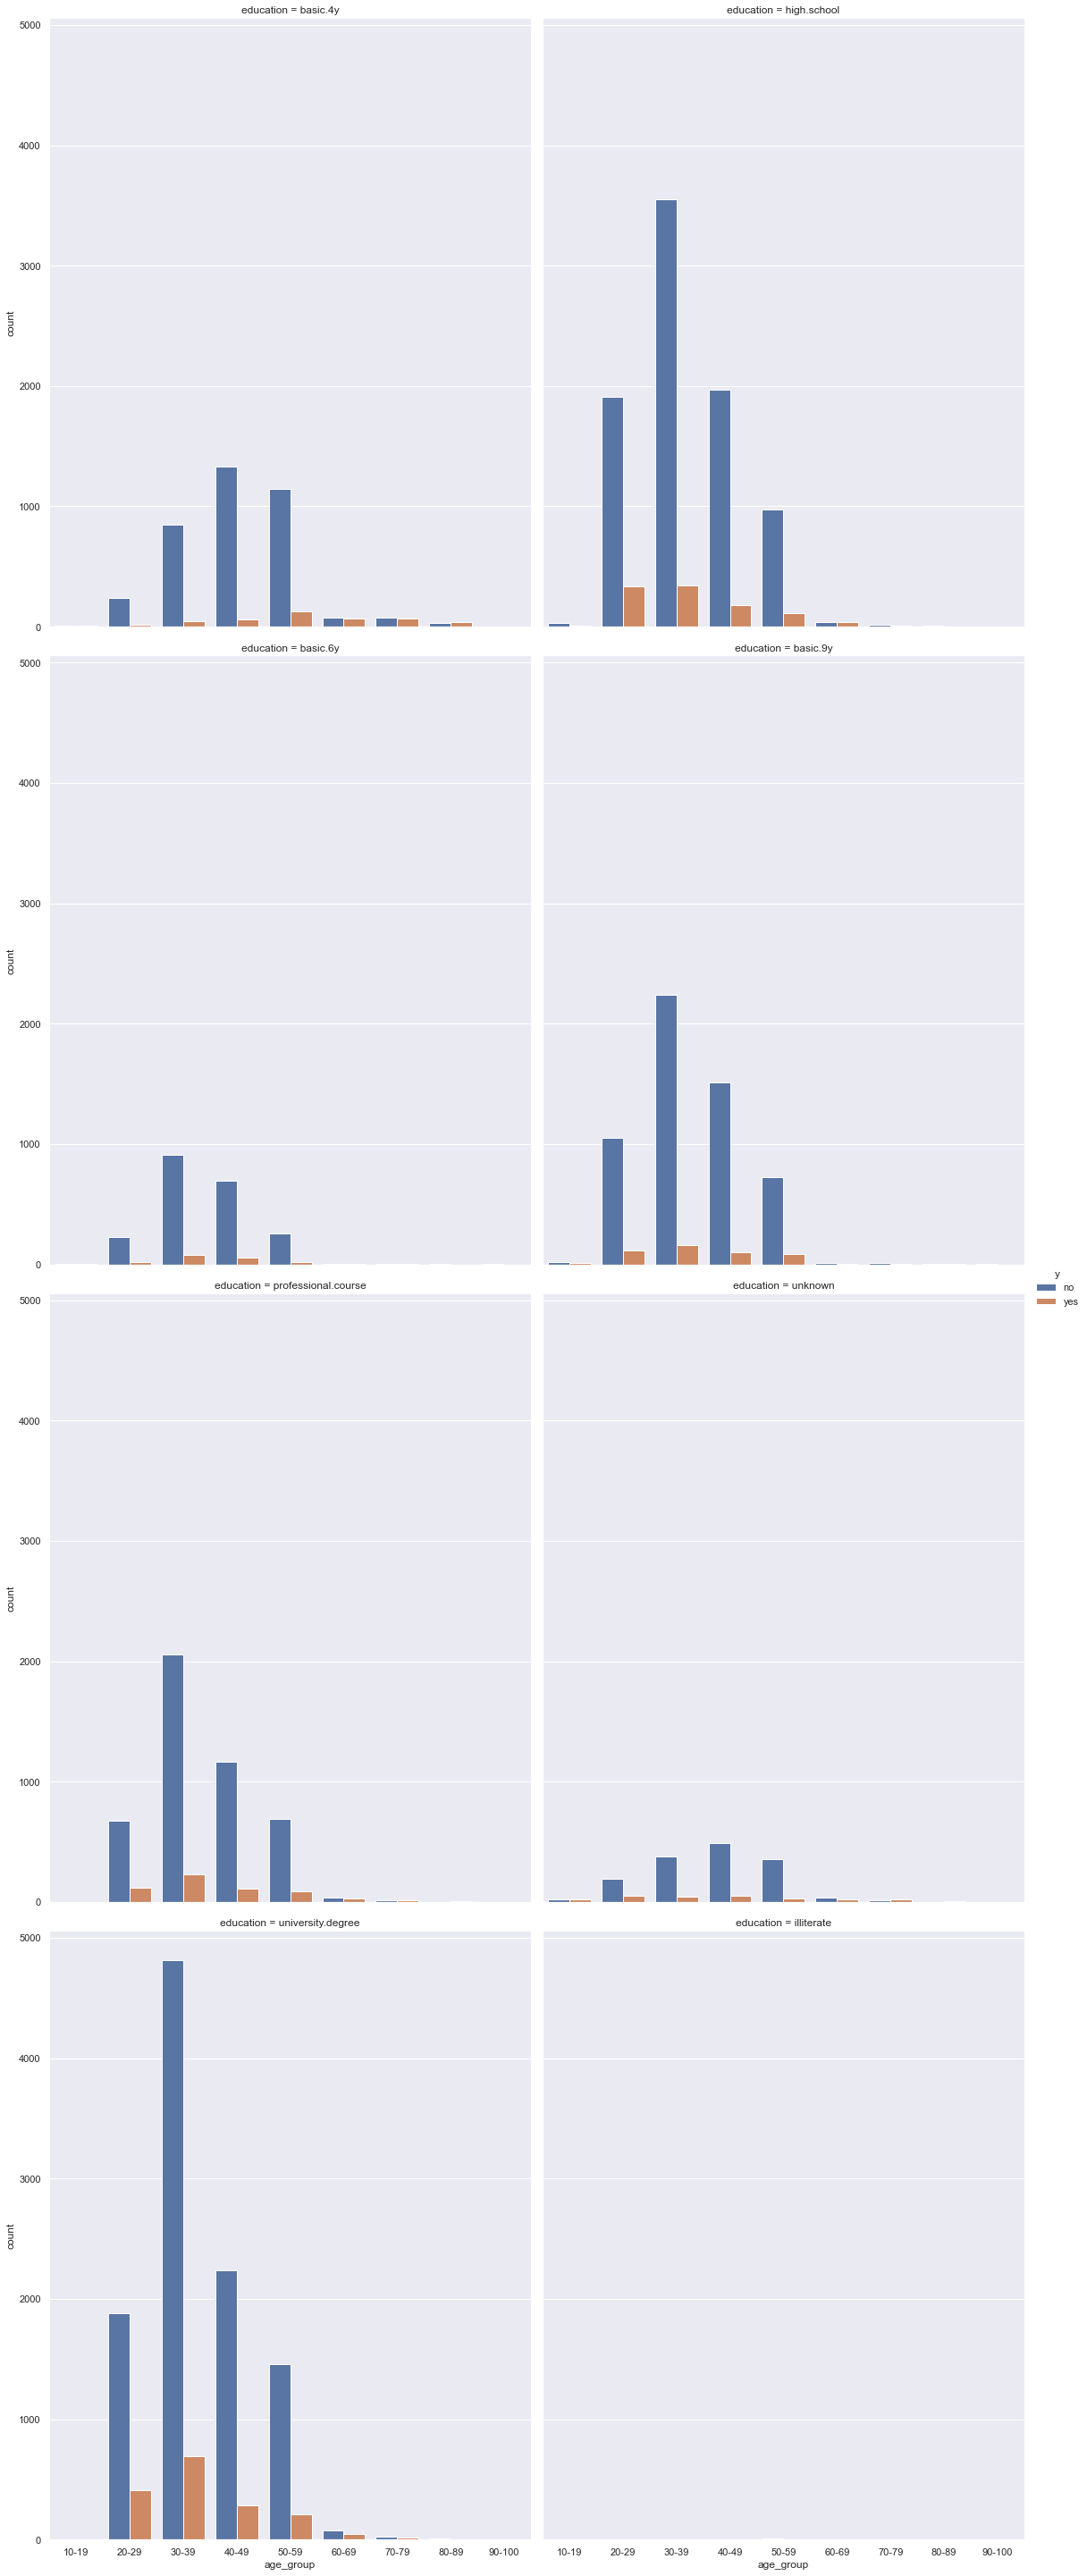

In [72]:
plotting_catplot('age_group','education')

Age Group and marital

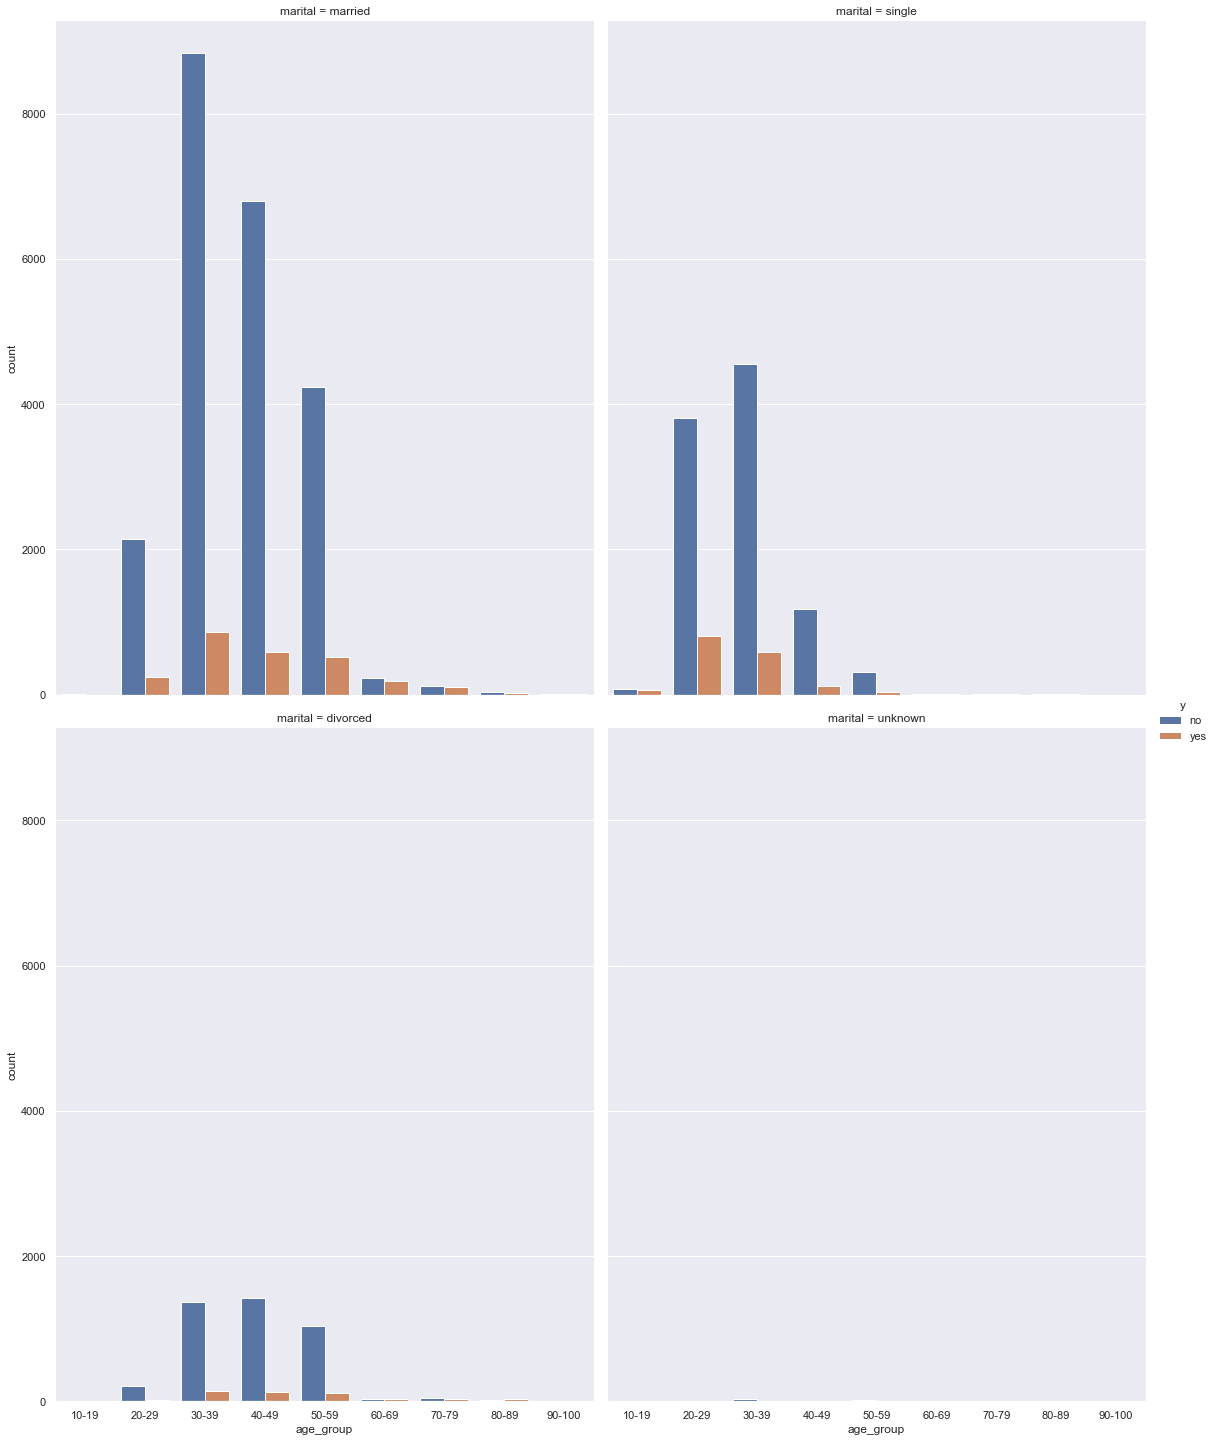

In [73]:
plotting_catplot('age_group','marital')

Age Group and Previous Loans

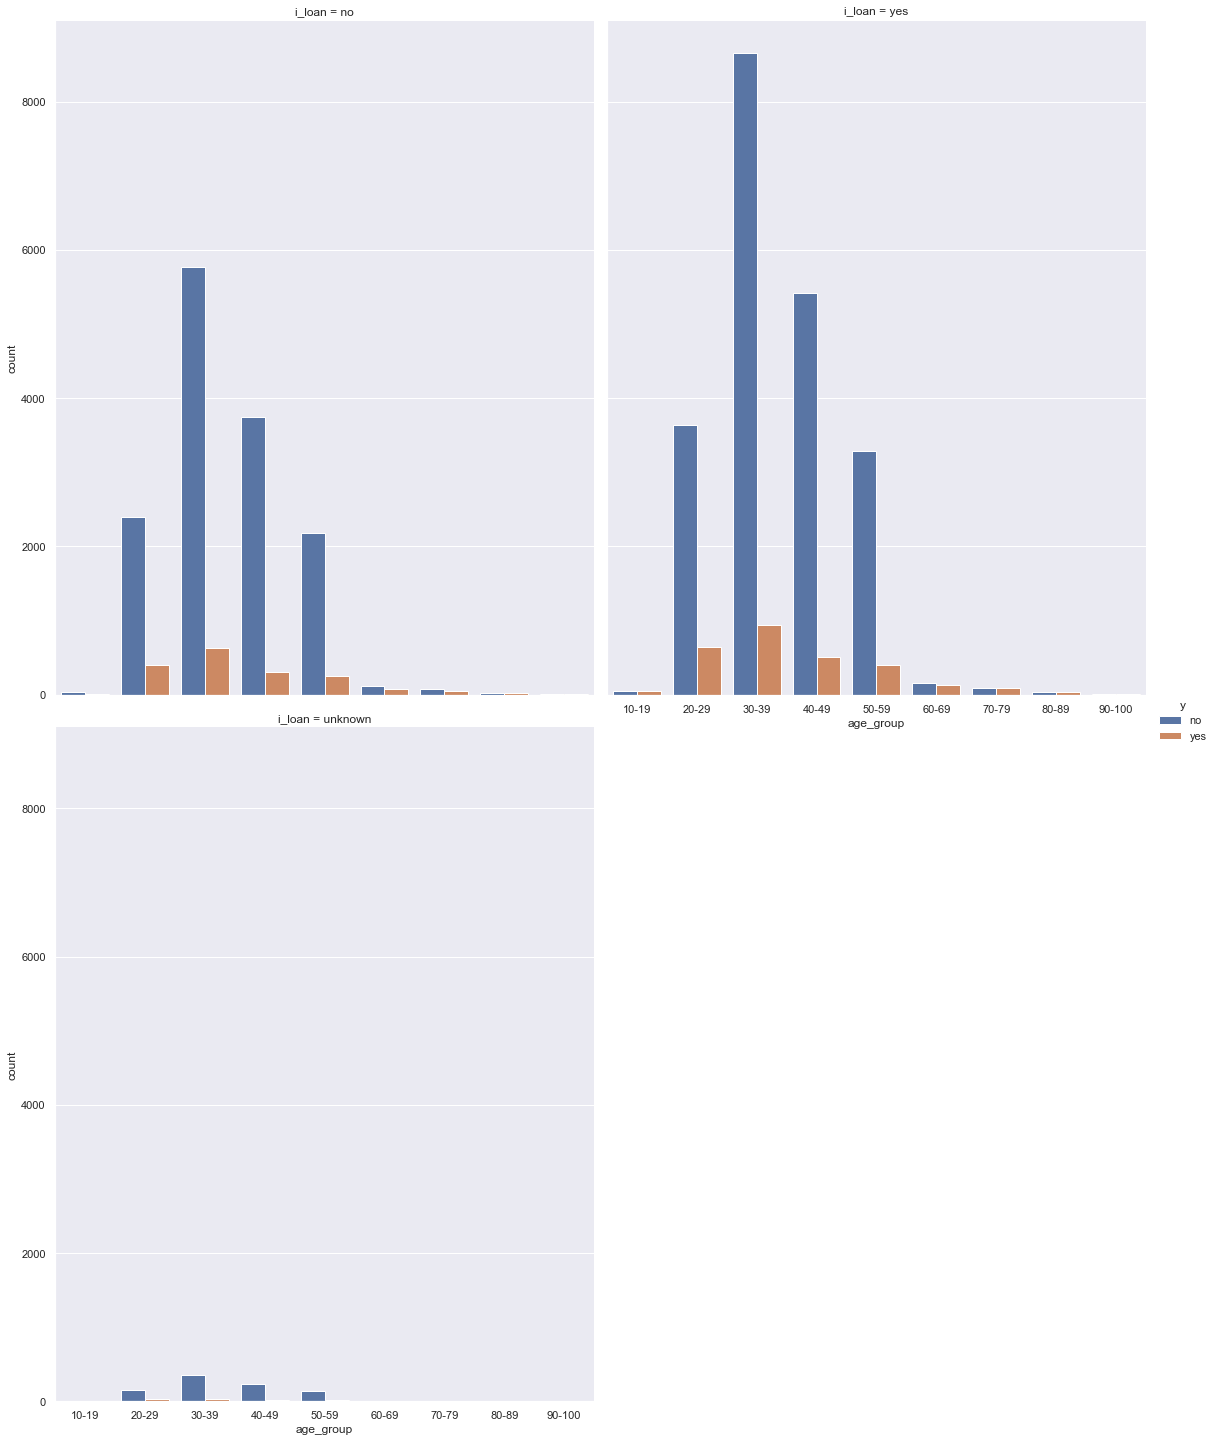

In [74]:
plotting_catplot('age_group','i_loan')

Education and Job

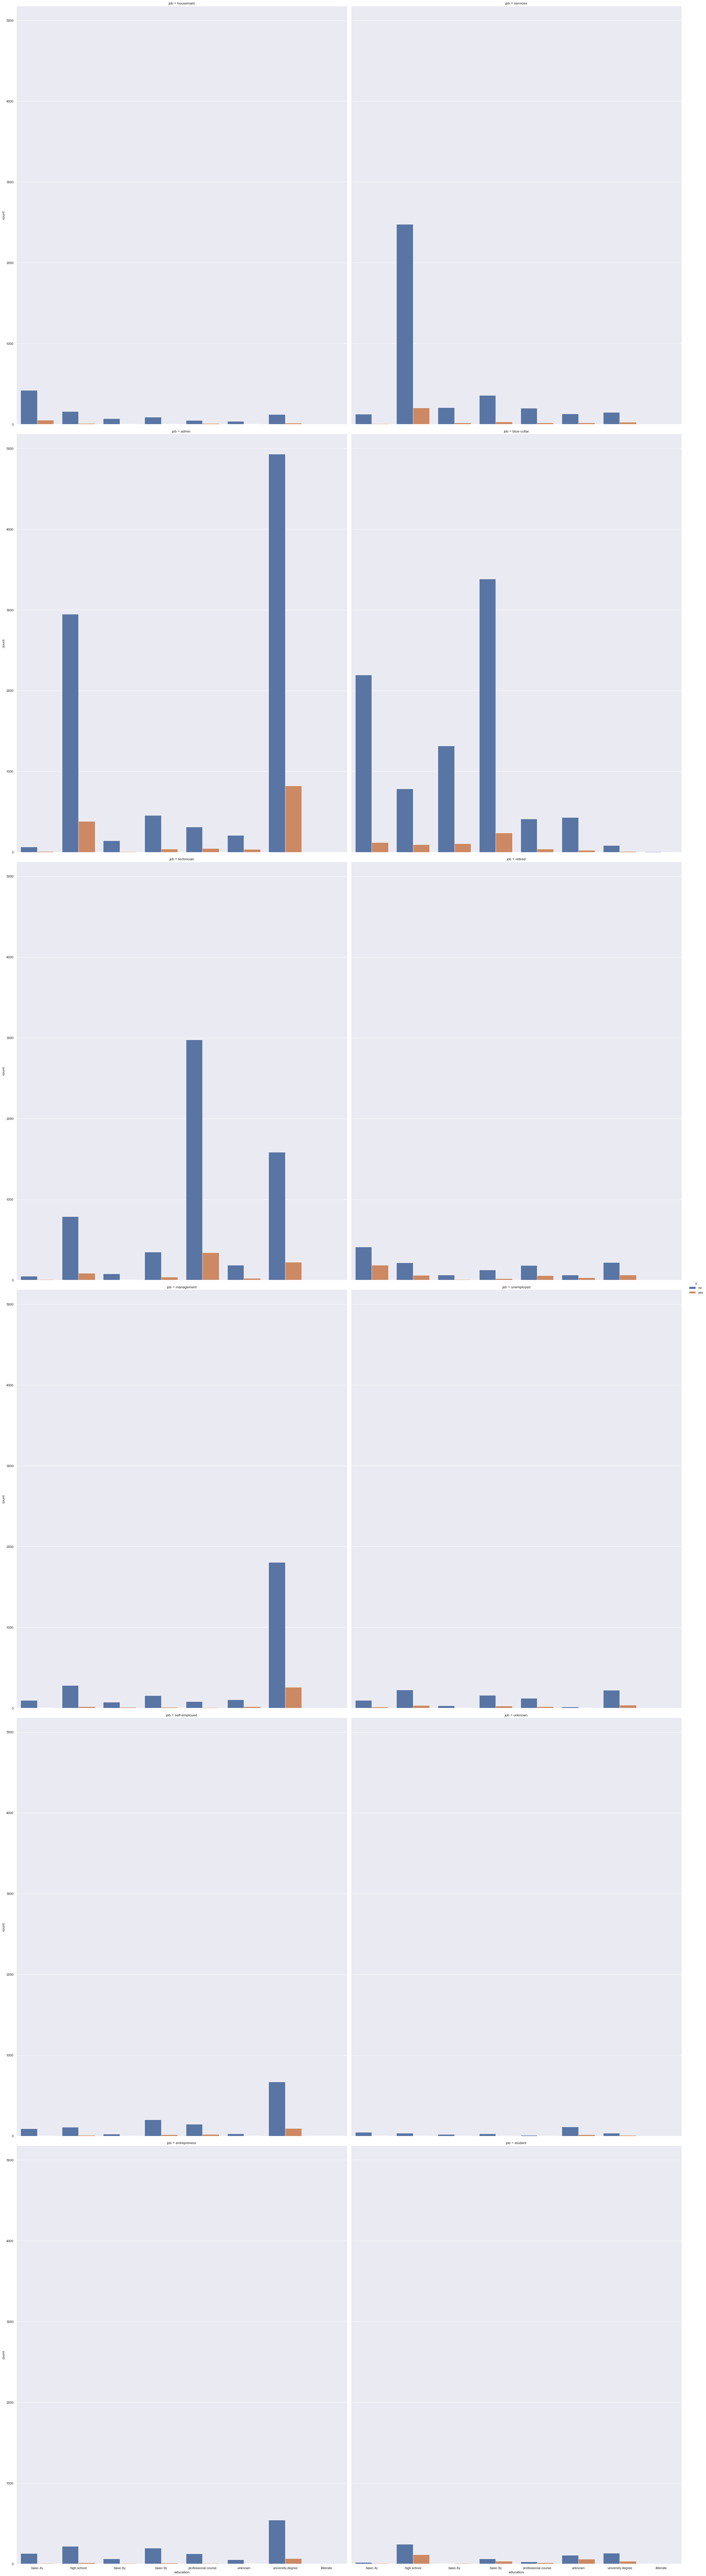

In [75]:
plotting_catplot('education','job',20)

Education and Marital

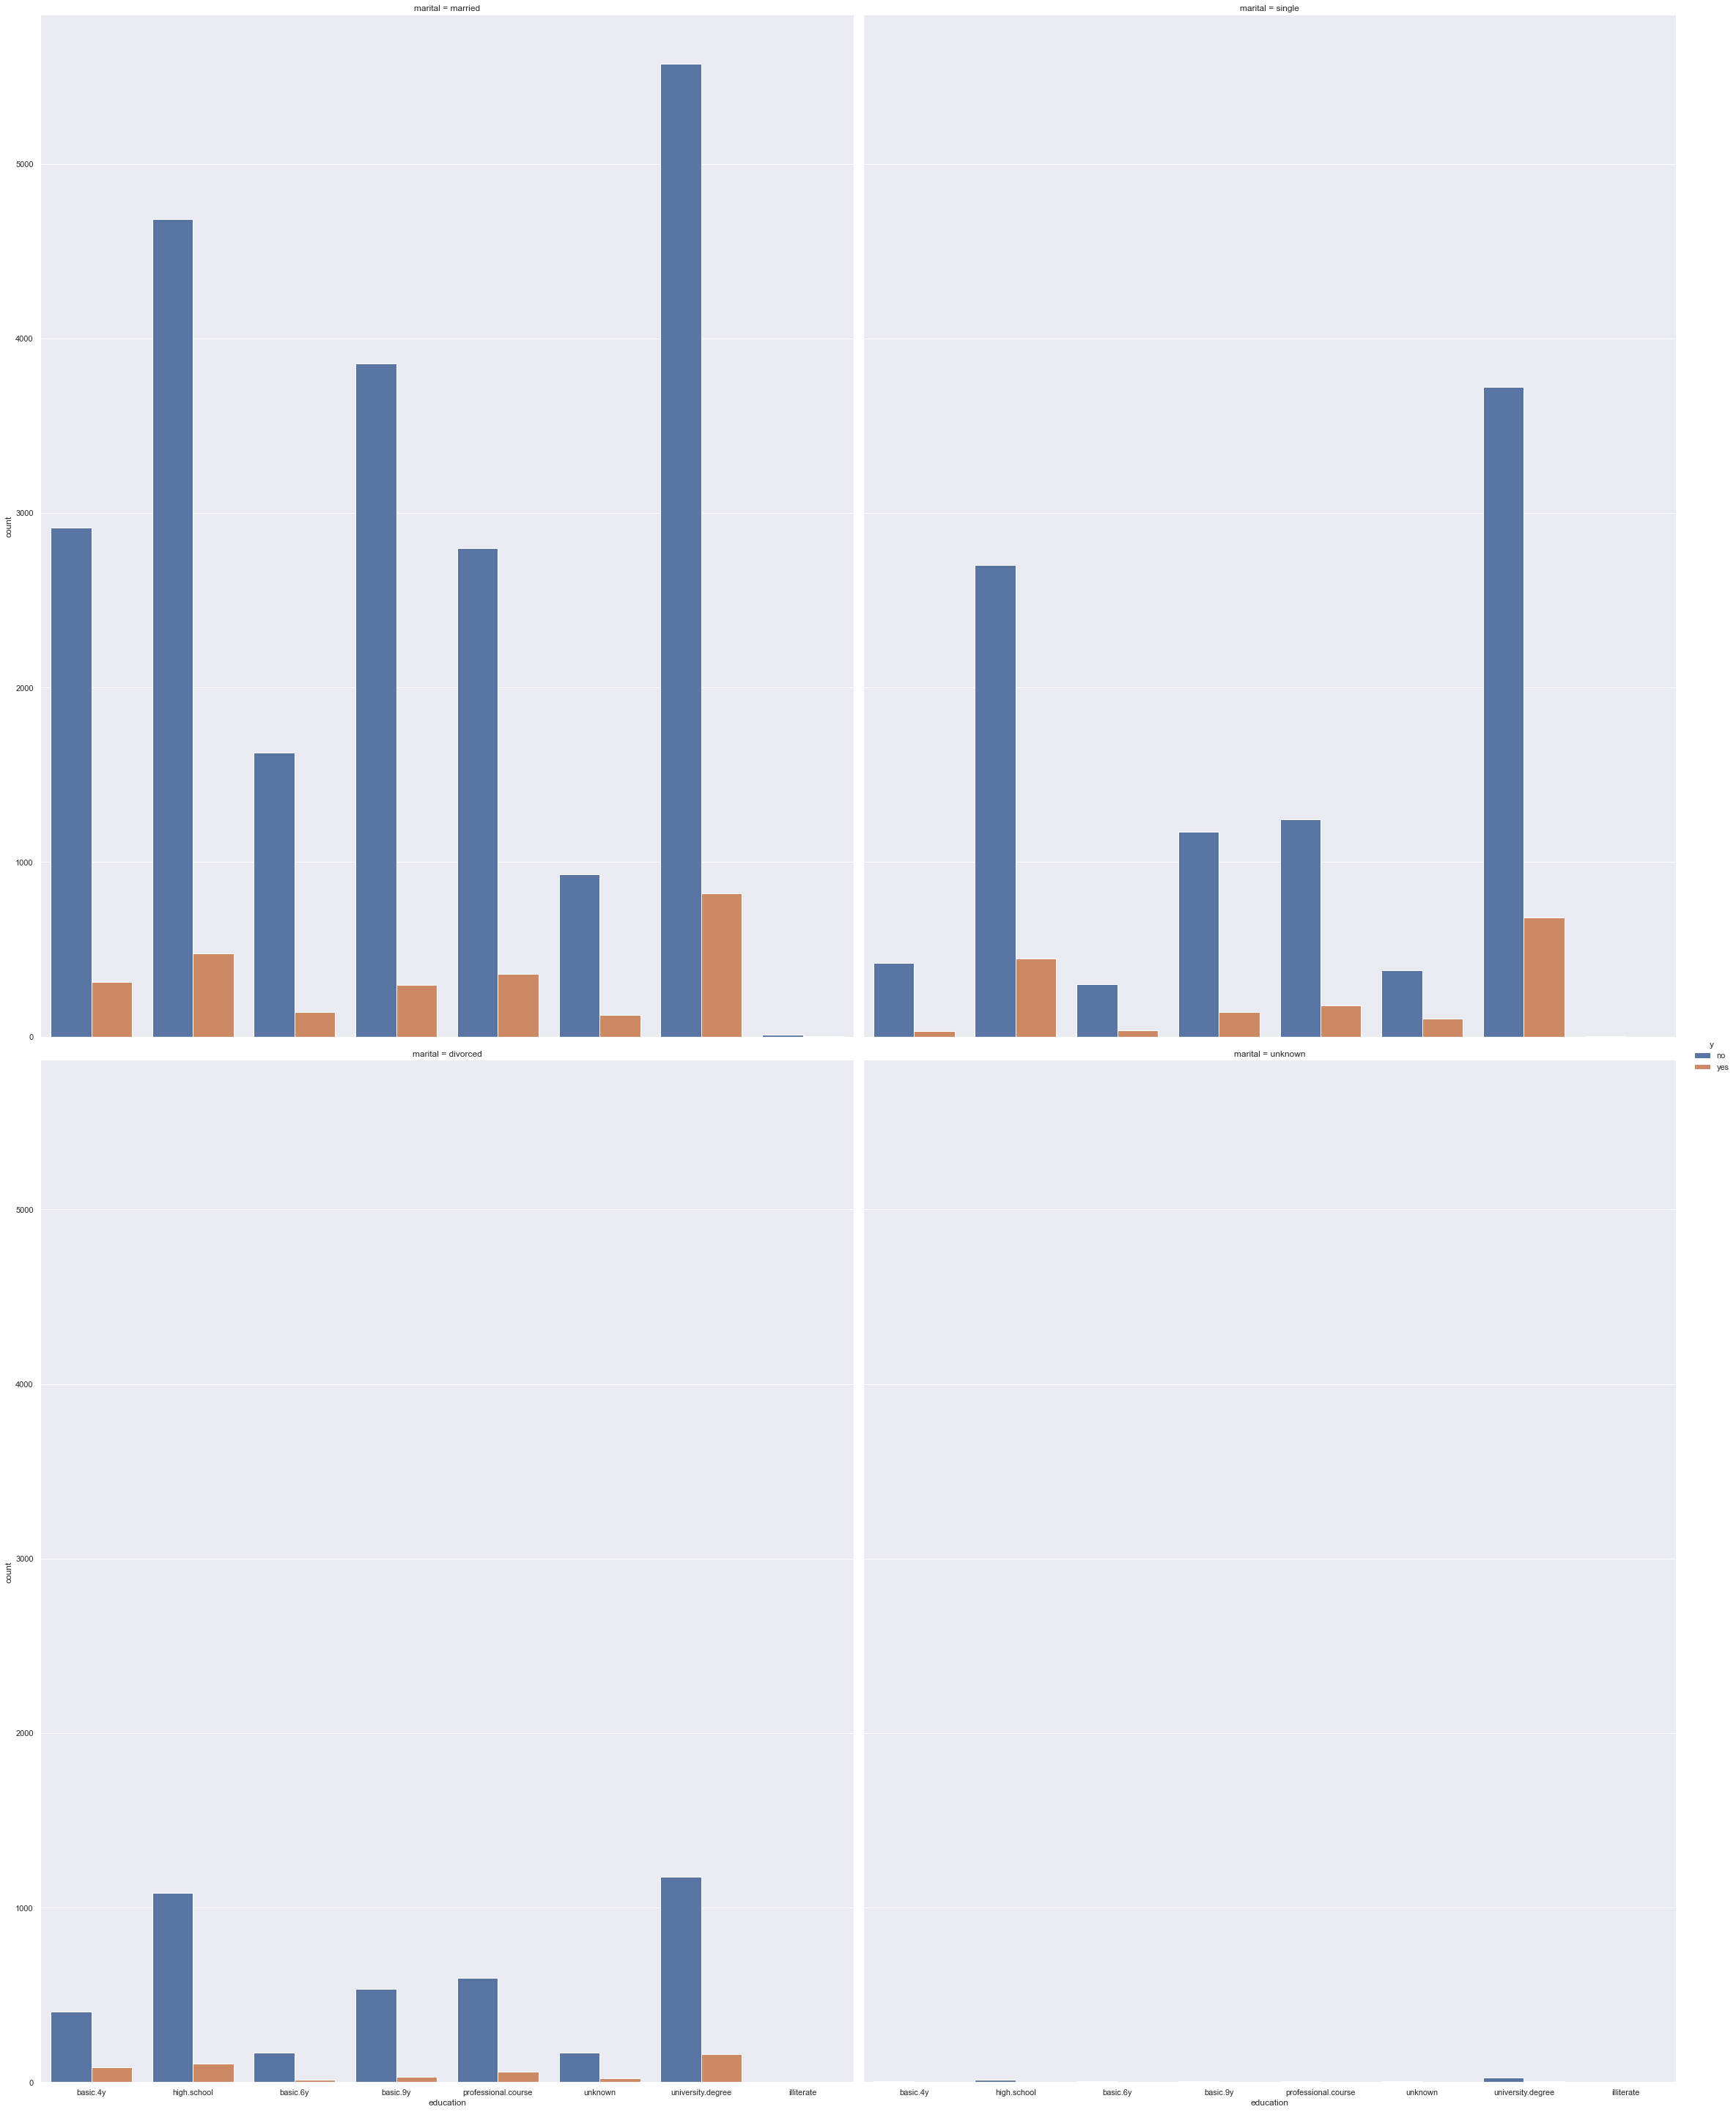

In [76]:
plotting_catplot('education','marital',20)

Previous Loan and Education

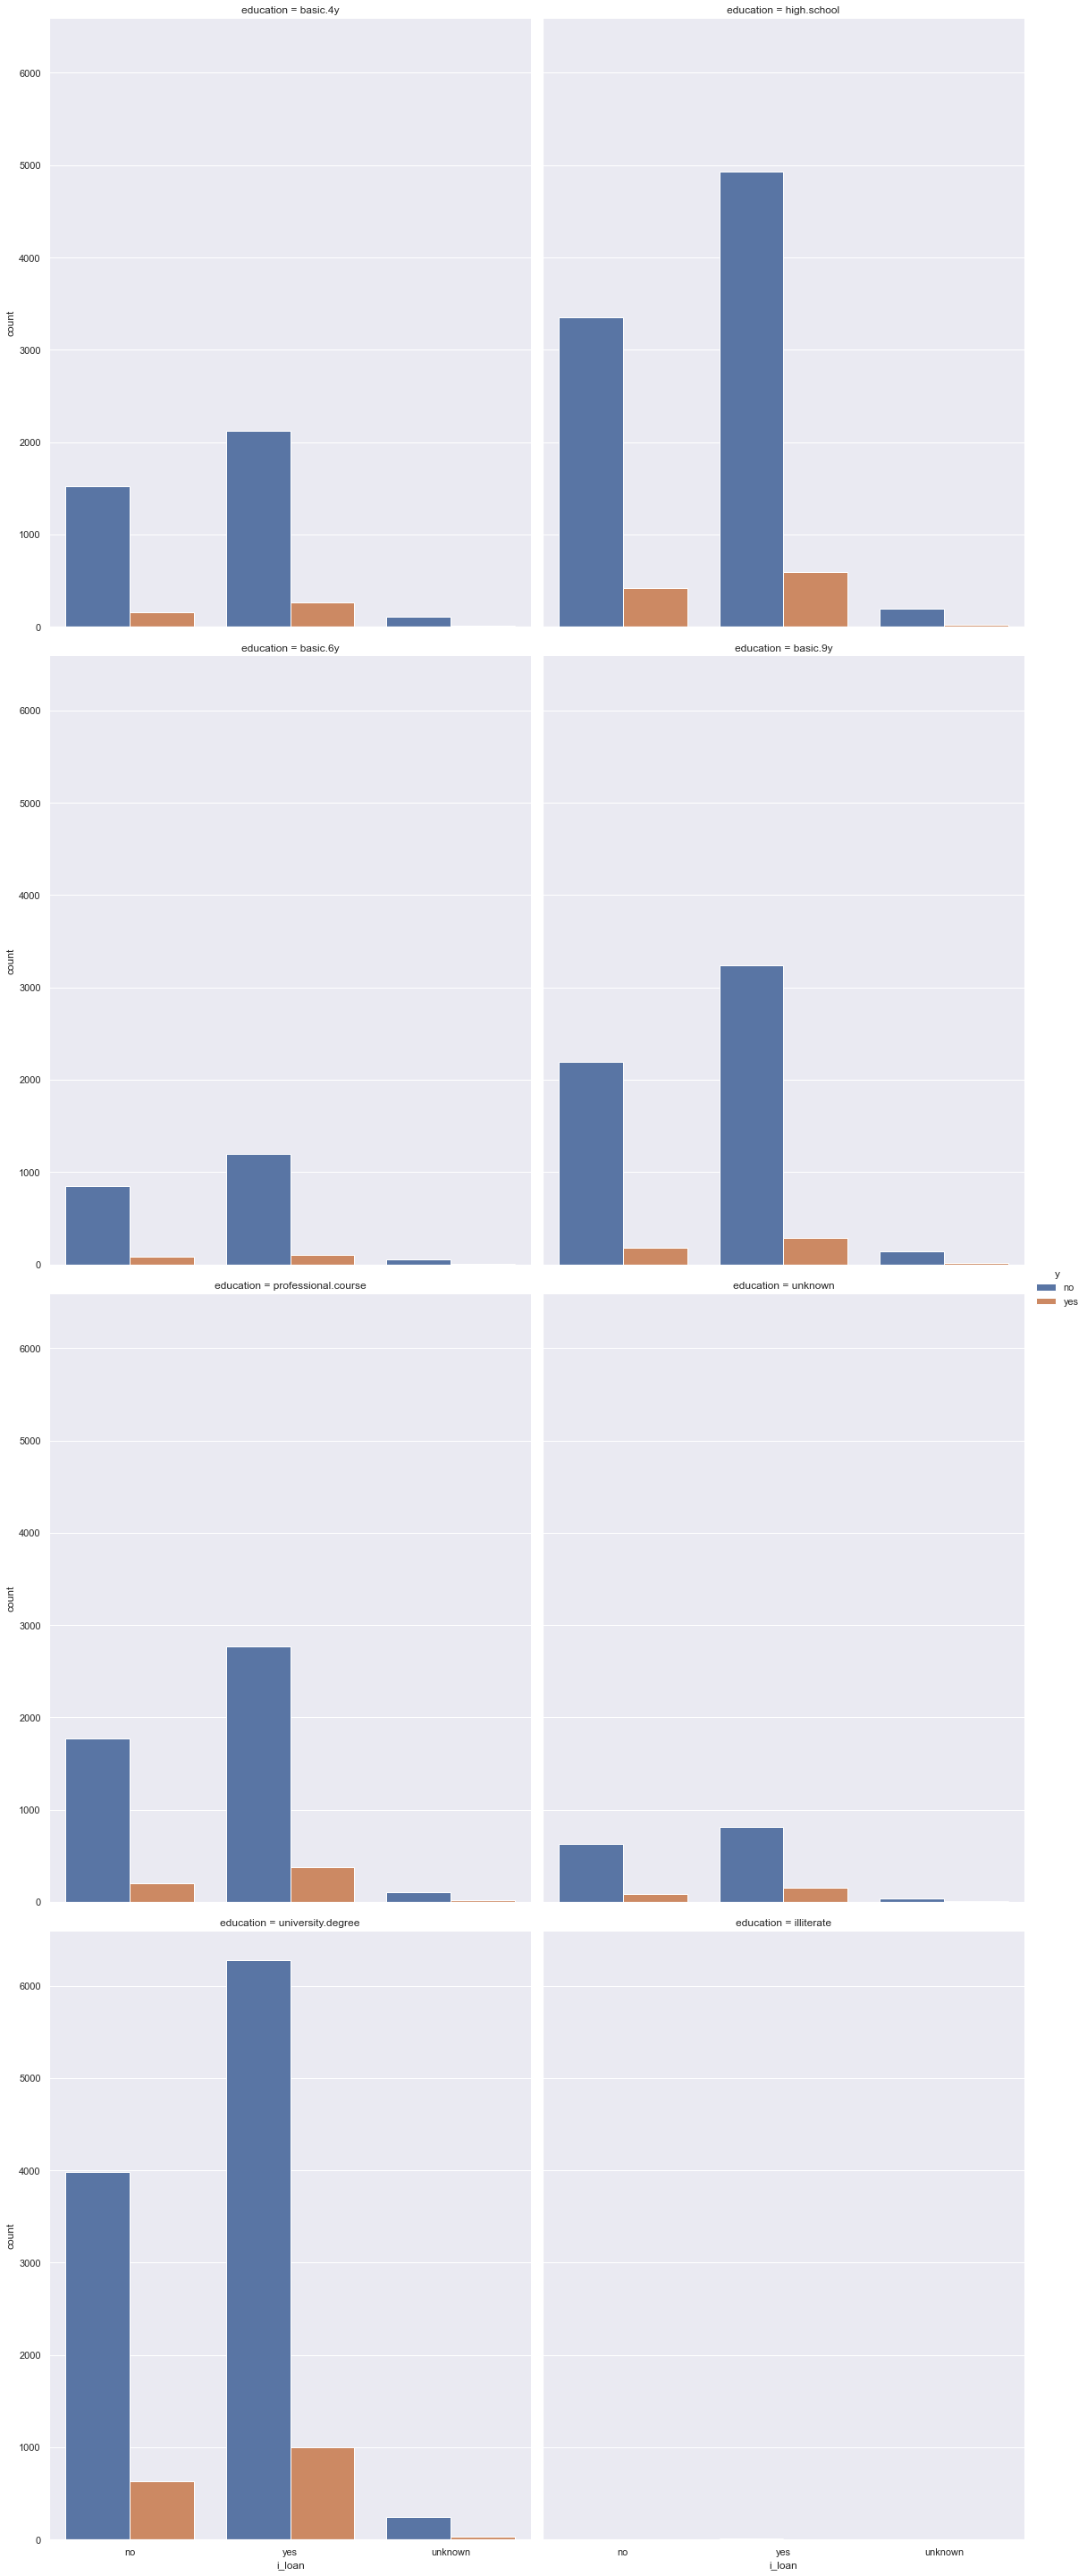

In [77]:
plotting_catplot('i_loan','education')

Marital Status and job

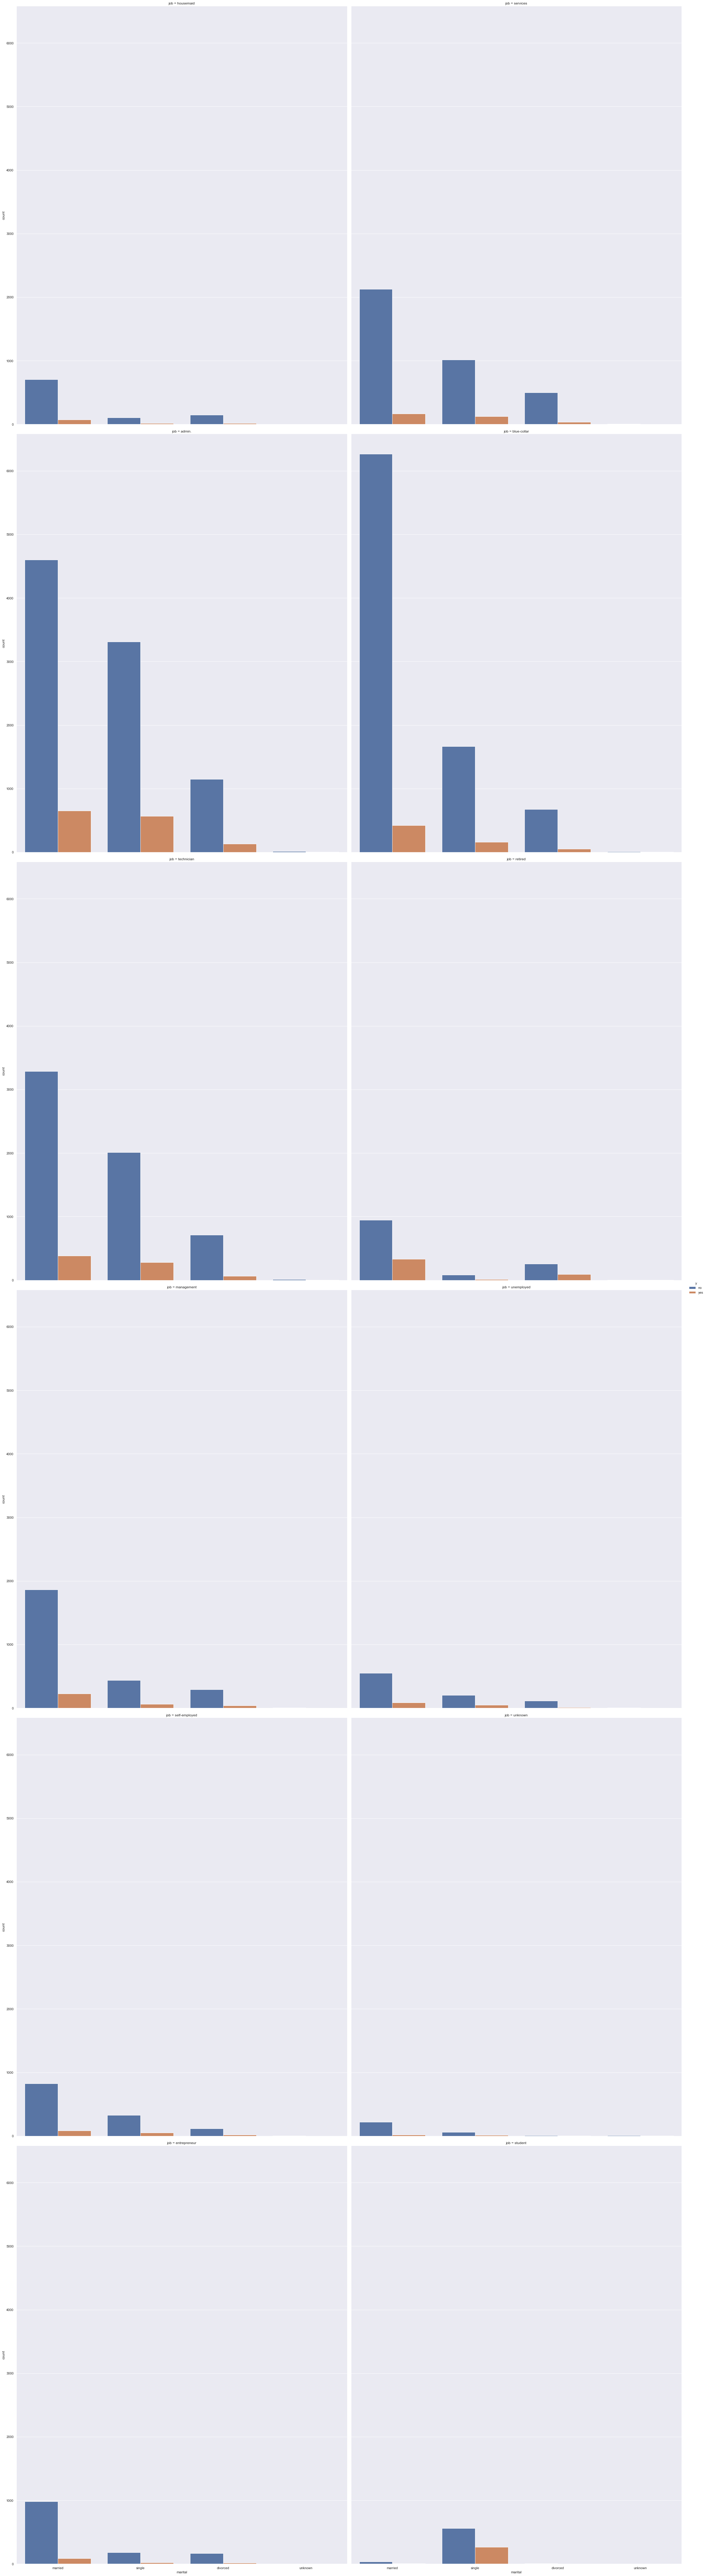

In [78]:
plotting_catplot('marital','job',20)

Previous Loan and marital Status

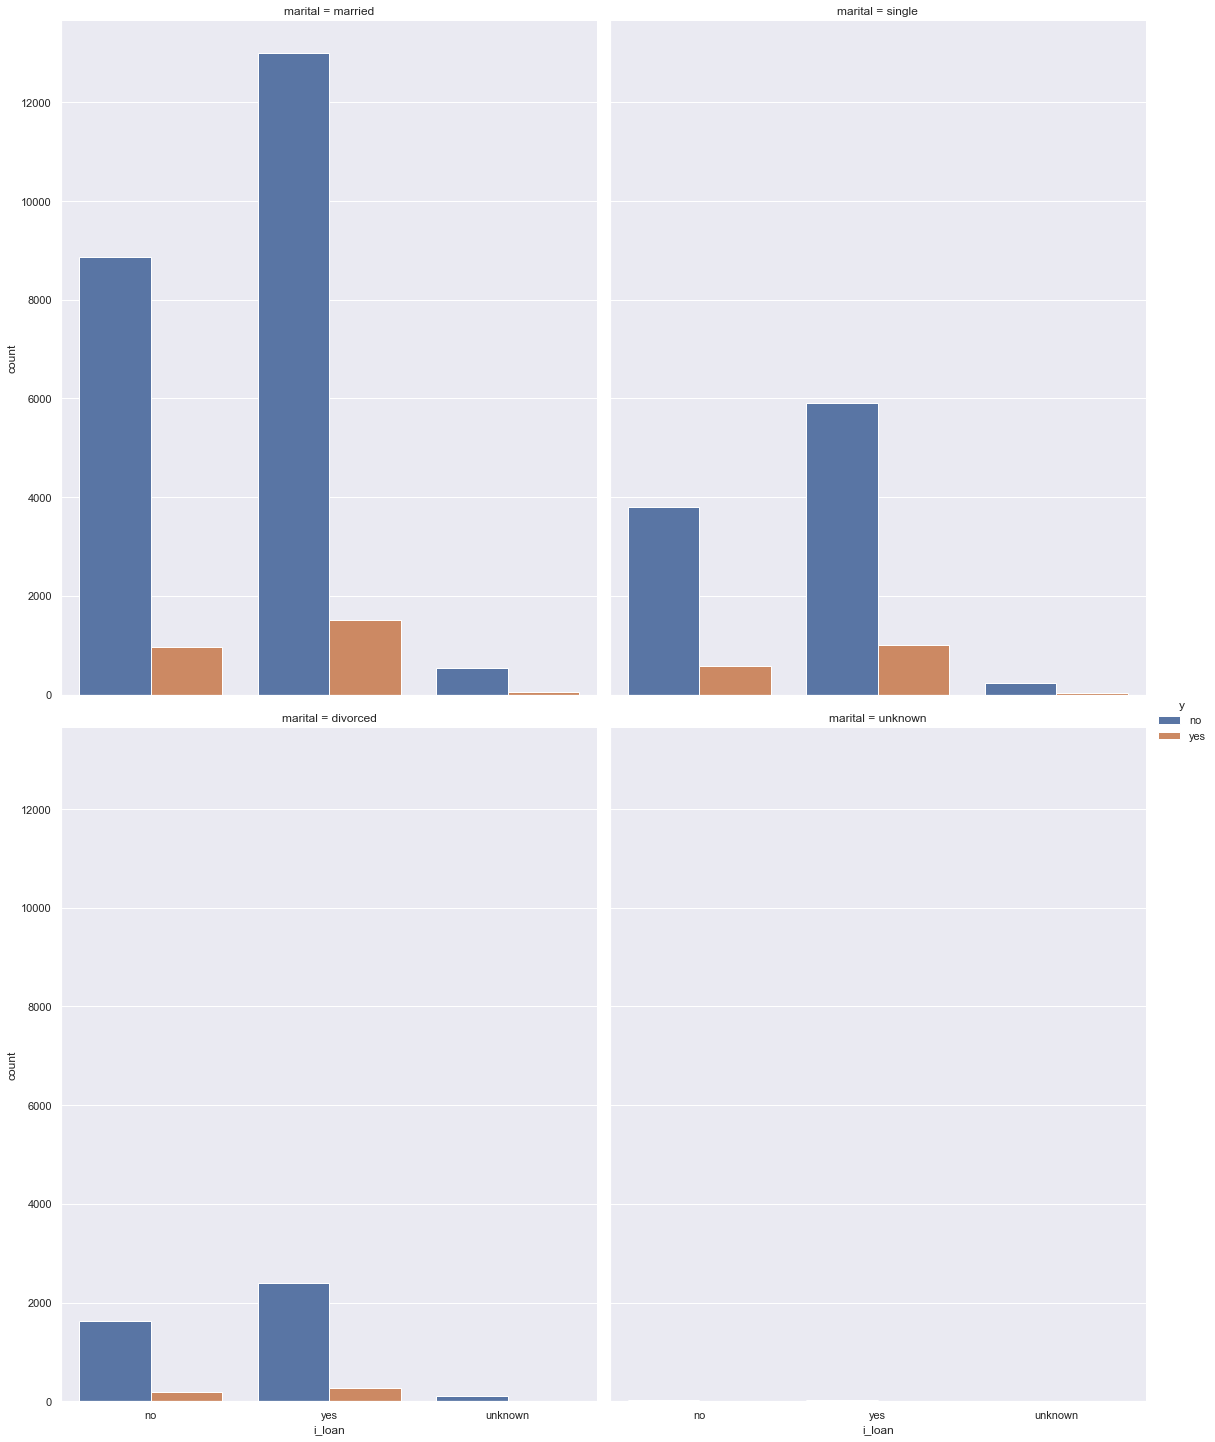

In [79]:
plotting_catplot('i_loan','marital')

Previous Loan and Job

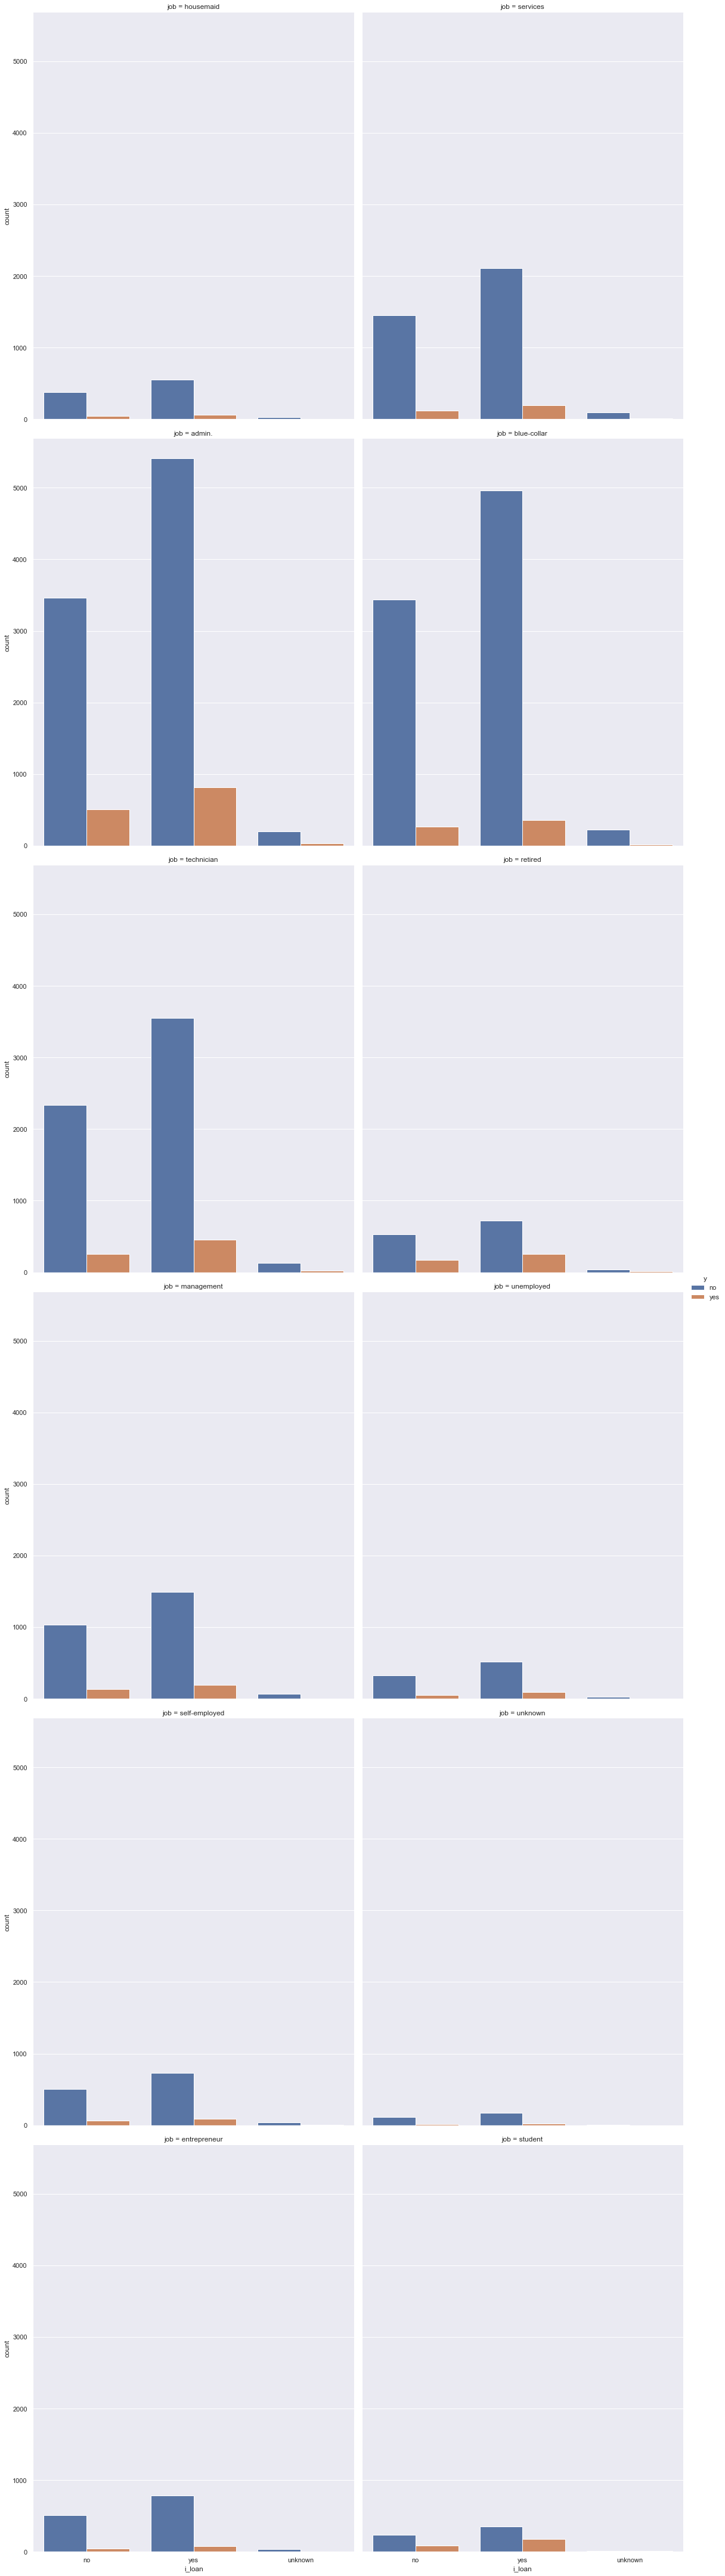

In [80]:
plotting_catplot('i_loan','job')

New Correlation Matrix after converting Age into Categorical variable

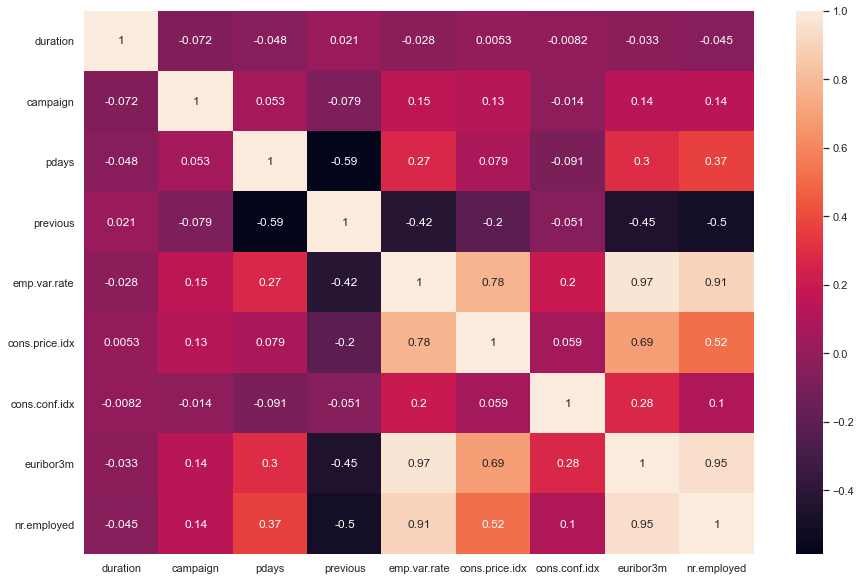

In [81]:
plotting_heatmap(df)

### Summary 

People who are in admin job has been more contacted for the deposits by the bank.
People who are married has been contacted more for the deposits by the bank.
People who has been contacted more on the cellular than the telephone.
People has been conatcted more in the month of May than any other month. They have not been contacted in January and Februray at all.
People has not been contacted on Saturday and Sunday
People with no default status has been contacted more by the bank.
People who has housing loan has been contacted more by the bank
People with no personal loan has been contacted more by the bank.
People who are in university has been contacted more by the bank.
Age,Duration,Campaign have outliers and are rightly skewed.
Pdays have more than 70% of data imputed so it is better either to impute or remove the column.
Euribor3m with nr.employed and emp.var.rate with nr.employed with the highest correlation
Converted the age into age_group with 9 group from 10-100.
Merged the personal,housing into i_loan which has 3 categories{yes,no,unknown}. Yes if a person has either of loan, no if person does have loan status as no and unknown if both the loan status is unknown.

Referential Integraity - Removing duplicates

In [82]:
duplicate_data=df[df.duplicated(keep="last")]
print("Duplicate Data",duplicate_data.shape)
duplicate_data.head()

Duplicate Data (27, 20)


,age_group,job,marital,education,default,i_loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
440,30-39,technician,married,professional.course,unknown,yes,telephone,may,tue,264,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
737,40-49,admin.,married,high.school,no,no,telephone,may,tue,157,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1251,40-49,blue-collar,married,basic.4y,unknown,no,telephone,may,thu,190,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1265,30-39,blue-collar,married,basic.6y,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2011,30-39,admin.,married,high.school,no,yes,telephone,may,mon,115,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [83]:
data=df.drop_duplicates()
data.shape

(41161, 20)

In [84]:
# Feature Engineering - mapping the values into binary yes->1 and no->0
def target_variable_binary(y):
    y=y.replace({"yes":1,"no":0},inplace=True)
   

In [85]:
target_variable_binary(data['y'])

Loading Preprocessed Data

In [86]:
df.to_csv('age_iloan.csv',index=False)

In [87]:
data=pd.read_csv('age_iloan.csv',sep=",")
data.columns

Index(['age_group', 'job', 'marital', 'education', 'default', 'i_loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [88]:
data.tail()

,age_group,job,marital,education,default,i_loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,70-79,retired,married,professional.course,no,yes,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,40-49,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,50-59,retired,married,university.degree,no,yes,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,40-49,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,70-79,retired,married,professional.course,no,yes,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


Separating Target Variable from the data.

In [89]:
#storing the y into target variable and dropping the y column from the data
target_variable=data['y']
data=data.drop('y',axis=1)

In [90]:
print("Target variable",target_variable.shape)
print("After dropping target variable",data.shape)

Target variable (41188,)
After dropping target variable (41188, 19)


In [91]:
print("Percentage of target variable belonging to Yes class",(target_variable.value_counts()[1]/len(target_variable))*100)
print("Percentage of target variable belonging to No class",(target_variable.value_counts()[0]/len(target_variable))*100)

Percentage of target variable belonging to Yes class 11.265417111780131
Percentage of target variable belonging to No class 88.73458288821988


Splitting Dataset into Test CV and Train

In [92]:
X_train, X_test, y_train, y_test = train_test_split(data, target_variable, test_size=0.20, random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)
print(y_train.shape)
print(y_cv.shape)
print(y_test.shape)

(26360, 19)
(6590, 19)
(8238, 19)
(26360,)
(6590,)
(8238,)


In [93]:
#this function seperates the categorical and numerical columns which would be easier for us to encode and feature scaling.
""""this function takes the train dataset and based on the datatype it seperates the feature"""
def splitting_categorical_numerical_columns(data):
   
    categorical_feature=data.dtypes==object
    categorical_columns=data.columns[categorical_feature].tolist()
    numerical_feature=data.dtypes!=object
    numerical_columns=data.columns[numerical_feature].tolist()
    return categorical_columns,numerical_columns

In [94]:
catgeorical_columns,numerical_columns=splitting_categorical_numerical_columns(X_train)
print(catgeorical_columns)
print(numerical_columns)

['age_group', 'job', 'marital', 'education', 'default', 'i_loan', 'contact', 'month', 'day_of_week', 'poutcome']
['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


## Data Modelling

In [95]:
"""this function takes the train,cv and test dataset and first it converts it into log transformation and normalize the data
For log transformation we always need to add some constant to avoid getting infinity. Here I have considered 100 as constant."""
def feature_scaling_numerical(train,cv,test,required=False):
    train=np.log(100+train)
    cv=np.log(100+cv)
    test=np.log(100+test)
    if required==True:
        normalizer= Normalizer()
        normalizer.fit(train.values.reshape(-1,1))
        train=normalizer.transform(train.values.reshape(1,-1))
        train=train.reshape(-1,1)
        cv=normalizer.transform(cv.values.reshape(1,-1))
        cv=cv.reshape(-1,1)
        test=normalizer.transform(test.values.reshape(1,-1))
        test=test.reshape(-1,1)
    return train,cv,test


In [96]:
train_duration,cv_duration,test_duration=feature_scaling_numerical(X_train['duration'],X_cv['duration'],X_test['duration'],True)
train_campaign,cv_campaign,test_campaign=feature_scaling_numerical(X_train['campaign'],X_cv['campaign'],X_test['campaign'],True)

train_previous,cv_previous,test_previous=feature_scaling_numerical(X_train['previous'],X_cv['previous'],X_test['previous'],True)
train_emp,cv_emp,test_emp=feature_scaling_numerical(X_train['emp.var.rate'],X_cv['emp.var.rate'],X_test['emp.var.rate'],True)
train_cons_price,cv_cons_price,test_cons_price=feature_scaling_numerical(X_train['cons.price.idx'],X_cv['cons.price.idx'],X_test['cons.price.idx'],True)
train_cons_conf,cv_cons_conf,test_cons_conf=feature_scaling_numerical(X_train['cons.conf.idx'],X_cv['cons.conf.idx'],X_test['cons.conf.idx'],True)
train_euribor,cv_euribor,test_euribor=feature_scaling_numerical(X_train['euribor3m'],X_cv['euribor3m'],X_test['euribor3m'],True)
train_nr_employed,cv_nr_employed,test_nr_employed=feature_scaling_numerical(X_train['nr.employed'],X_cv['nr.employed'],X_test['nr.employed'],True)

In [97]:
def batch_predict(clf,data):
    y_data_pred=[]
    tr_loop=data.shape[0]-data.shape[0]%10000
    for i in range(0,tr_loop,10000):
        y_data_pred.extend(clf.predict_proba(data[i:i+10000])[:,1])
        
    if data.shape[0]%10000!=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [98]:
def find_best_threshold(threshold,fpr,tpr):
    t=threshold[np.argmax(tpr*(1-fpr))]
    
    #print("the maximum value of tpr*(1-fpr)",max(tpr*(1-fpr)),"for threshold",np.round(t,3))
    return t

def prediction_with_best_t(proba,threshold):
    #print("theshold",threshold)
    predictions=[]
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [99]:
"""this function takes the classifier object,train,test data send it to batch_predict function to calculate the class probablity
belonging to class 1 append the probablity to the list and return it as a list. Then we calculate tpr and fpr values and plot it 
also calculating to get auc score Along printing the confusion matrix of both train and test data of metaclassifier"""
def calculating_roc_auc_score(classifier,train,test,y_train,y_test):
    classifier.fit(train,y_train)
    y_train_predict=batch_predict(classifier,train)
    y_test_predict=batch_predict(classifier,test)
    train_fpr,train_tpr,train_threshold=roc_curve(y_train,y_train_predict)
    test_fpr,test_tpr,test_threshold=roc_curve(y_test,y_test_predict)
    plt.pyplot.plot(train_fpr,train_tpr,label='Train ROC Curve')
    plt.pyplot.plot(test_fpr,test_tpr,label='Test ROC Curve')
    plt.pyplot.legend()
    plt.pyplot.xlabel('FPR')
    plt.pyplot.ylabel('TPR')
    plt.pyplot.title('TPR vs FPR graph')
    plt.pyplot.grid()
    plt.pyplot.show()

 
    print("Train AUC Score",auc(train_fpr,train_tpr))
    print("Test AUC Score",auc(test_fpr,test_tpr))
    print()
    print()
  
  #Printing Confusion matrix on train and test dataset
    fig=plt.pyplot.figure()
    ax=fig.add_subplot(111)
    best_t= find_best_threshold(train_threshold,train_fpr,train_tpr)
    print("Train Confusion Matrix")
    y_train_predicti=prediction_with_best_t(y_train_predict,best_t)
    train_matrix=confusion_matrix(y_train,y_train_predicti)
    sns.heatmap(train_matrix,annot=True,fmt='d')
    plt.pyplot.show(ax)
    print()
    fig=plt.pyplot.figure()
    ax1=fig.add_subplot(111)
    print("Test Cofusion Matrix")
    y_test_predicti=prediction_with_best_t(y_test_predict,best_t)
    test_matrix=confusion_matrix(y_test,y_test_predicti)
    sns.heatmap(test_matrix,annot=True,fmt='d')
    plt.pyplot.show(ax1)

## One Hot Encoding

In [100]:
def count_vectorizing_categorical(train,cv,test):
    """"token pattern is used because count vectorizer without token considers only
2 letters and use punctuation marks as seperator but in some of our categories in categorical columns
contains punctuations and we dont want to use it as seperator. """
   
    countVectorizer=CountVectorizer(token_pattern="[a-zA-Z0-9-.]+")
    train=countVectorizer.fit_transform(train)
    cv=countVectorizer.transform(cv)
    test=countVectorizer.transform(test)
    

    return train,cv,test

    

In [101]:
train_age,cv_age,test_age=count_vectorizing_categorical(X_train['age_group'],X_cv['age_group'],X_test['age_group'])
train_job,cv_job,test_job=count_vectorizing_categorical(X_train['job'],X_cv['job'],X_test['job'])
train_marital,cv_marital,test_marital=count_vectorizing_categorical(X_train['marital'],X_cv['marital'],X_test['marital'])
train_education,cv_education,test_education=count_vectorizing_categorical(X_train['education'],X_cv['education'],X_test['education'])
train_default,cv_default,test_default=count_vectorizing_categorical(X_train['default'],X_cv['default'],X_test['default'])
train_iloan,cv_iloan,test_iloan=count_vectorizing_categorical(X_train['i_loan'],X_cv['i_loan'],X_test['i_loan'])
train_contact,cv_contact,test_contact=count_vectorizing_categorical(X_train['contact'],X_cv['contact'],X_test['contact'])
train_month,cv_month,test_month=count_vectorizing_categorical(X_train['month'],X_cv['month'],X_test['month'])
train_day,cv_day,test_day=count_vectorizing_categorical(X_train['day_of_week'],X_cv['day_of_week'],X_test['day_of_week'])
train_poutcome,cv_poutcome,test_poutcome=count_vectorizing_categorical(X_train['poutcome'],X_cv['poutcome'],X_test['poutcome'])

Stacking Columns with duration for Baseline Model.

In [102]:
x_train_ohe_d=hstack((train_age,train_job,train_marital,train_education,train_default,train_iloan,train_contact,train_month,train_day,train_poutcome,train_duration,train_campaign,train_previous,train_emp,train_cons_price,train_cons_conf,train_euribor,train_nr_employed)).tocsr()
print(x_train_ohe_d.shape)
x_cv_ohe_d=hstack((cv_age,cv_job,cv_marital,cv_education,cv_default,cv_iloan,cv_contact,cv_month,cv_day,cv_poutcome,cv_duration,cv_campaign,cv_previous,cv_emp,cv_cons_price,cv_cons_conf,cv_euribor,cv_nr_employed)).tocsr()
print(x_cv_ohe_d.shape)
x_test_ohe_d=hstack((test_age,test_job,test_marital,test_education,test_default,test_iloan,test_contact,test_month,test_day,test_poutcome,test_duration,test_campaign,test_previous,test_emp,test_cons_price,test_cons_conf,test_euribor,test_nr_employed)).tocsr()
print(x_test_ohe_d.shape)

(26360, 67)
(6590, 67)
(8238, 67)


Baseline Model

In [103]:
strategy=["uniform","prior","stratified","most_frequent"]
cv_auc=[]
for star in tq.tqdm(strategy):
    dummy_clf = DummyClassifier(strategy=star)
    
    sig_clf = CalibratedClassifierCV(dummy_clf, method="sigmoid")
    sig_clf.fit(x_train_ohe_d, y_train)
    predict_y = sig_clf.predict_proba(x_cv_ohe_d)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

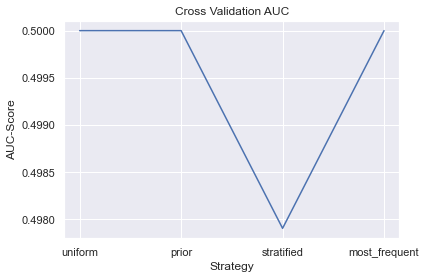

In [104]:
fig,ax=plt.subplots()
plt.plot(strategy,cv_auc)

plt.title("Cross Validation AUC")
plt.xlabel("Strategy")
plt.ylabel("AUC-Score")
plt.show()

In [105]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(x_train_ohe_d), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(x_test_ohe_d), average='macro'))

Train F1-Score: 0.4702252949333762
Test F1-Score: 0.46991828067691915


In [106]:
x_train_ohe=hstack((train_age,train_job,train_marital,train_education,train_default,train_iloan,train_contact,train_month,train_day,train_poutcome,train_campaign,train_previous,train_emp,train_cons_price,train_cons_conf,train_euribor,train_nr_employed)).tocsr()
print(x_train_ohe.shape)
x_cv_ohe=hstack((cv_age,cv_job,cv_marital,cv_education,cv_default,cv_iloan,cv_contact,cv_month,cv_day,cv_poutcome,cv_campaign,cv_previous,cv_emp,cv_cons_price,cv_cons_conf,cv_euribor,cv_nr_employed)).tocsr()
print(x_cv_ohe.shape)
x_test_ohe=hstack((test_age,test_job,test_marital,test_education,test_default,test_iloan,test_contact,test_month,test_day,test_poutcome,test_campaign,test_previous,test_emp,test_cons_price,test_cons_conf,test_euribor,test_nr_employed)).tocsr()
print(x_test_ohe.shape)

(26360, 66)
(6590, 66)
(8238, 66)


Random Forest and XGBoost Classifier

In [107]:
train_dataset=np.hstack((train_age.toarray(),train_job.toarray(),train_marital.toarray(),train_education.toarray(),train_default.toarray(),train_iloan.toarray(),train_contact.toarray(),train_month.toarray(),train_day.toarray(),train_poutcome.toarray(),X_train['campaign'].to_numpy().reshape(len(X_train),1),X_train['previous'].to_numpy().reshape(len(X_train),1),X_train['emp.var.rate'].to_numpy().reshape(len(X_train),1),X_train['cons.price.idx'].to_numpy().reshape(len(X_train),1),X_train['cons.conf.idx'].to_numpy().reshape(len(X_train),1),X_train['euribor3m'].to_numpy().reshape(len(X_train),1),X_train['nr.employed'].to_numpy().reshape(len(X_train),1)))
print(train_dataset.shape)
cv_dataset=np.hstack((cv_age.toarray(),cv_job.toarray(),cv_marital.toarray(),cv_education.toarray(),cv_default.toarray(),cv_iloan.toarray(),cv_contact.toarray(),cv_month.toarray(),cv_day.toarray(),cv_poutcome.toarray(),X_cv['campaign'].to_numpy().reshape(len(X_cv),1),X_cv['previous'].to_numpy().reshape(len(X_cv),1),X_cv['emp.var.rate'].to_numpy().reshape(len(X_cv),1),X_cv['cons.price.idx'].to_numpy().reshape(len(X_cv),1),X_cv['cons.conf.idx'].to_numpy().reshape(len(X_cv),1),X_cv['euribor3m'].to_numpy().reshape(len(X_cv),1),X_cv['nr.employed'].to_numpy().reshape(len(X_cv),1)))
print(cv_dataset.shape)
test_dataset=np.hstack((test_age.toarray(),test_job.toarray(),test_marital.toarray(),test_education.toarray(),test_default.toarray(),test_iloan.toarray(),test_contact.toarray(),test_month.toarray(),test_day.toarray(),test_poutcome.toarray(),X_test['campaign'].to_numpy().reshape(len(X_test),1),X_test['previous'].to_numpy().reshape(len(X_test),1),X_test['emp.var.rate'].to_numpy().reshape(len(X_test),1),X_test['cons.price.idx'].to_numpy().reshape(len(X_test),1),X_test['cons.conf.idx'].to_numpy().reshape(len(X_test),1),X_test['euribor3m'].to_numpy().reshape(len(X_test),1),X_test['nr.employed'].to_numpy().reshape(len(X_test),1)))
print(test_dataset.shape)

(26360, 66)
(6590, 66)
(8238, 66)


Logistic Regression

In [108]:
lambda_values=[10 ** lam for lam in range(-5,4)]
cv_auc=[]
for value in tq.tqdm(lambda_values):
    lr=LogisticRegression(penalty='l2',C=value,class_weight='balanced')
    
    sig_clf = CalibratedClassifierCV(lr, method="sigmoid")
    sig_clf.fit(x_train_ohe, y_train)
    predict_y = sig_clf.predict_proba(x_cv_ohe)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

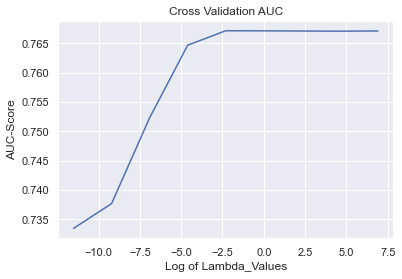

In [110]:
fig,ax=plt.subplots()
plt.plot(np.log(lambda_values),cv_auc)

plt.title("Cross Validation AUC")
plt.xlabel("Log of Lambda_Values")
plt.ylabel("AUC-Score")
plt.show()

In [111]:
index_of_best_auc=np.argmax(cv_auc)
print("Best lambda",lambda_values[index_of_best_auc])

Best lambda 0.1


In [113]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(x_train_ohe), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(x_test_ohe), average='macro'))

Train F1-Score: 0.6100028343240003
Test F1-Score: 0.6075326874448538


Linear SVM

In [114]:
lambda_values=[10 ** lam for lam in range(-5,4)]
cv_auc=[]
for value in tq.tqdm(lambda_values):
    SVM = SGDClassifier(penalty='l2',alpha=value,class_weight='balanced')
   
    sig_clf = CalibratedClassifierCV(SVM, method="sigmoid")
    sig_clf.fit(x_train_ohe,y_train)
    predict_y = sig_clf.predict_proba(x_cv_ohe)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

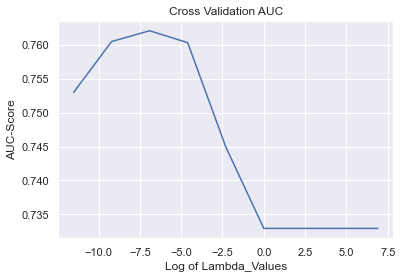

Best lambda 0.001


In [116]:
fig,ax=plt.subplots()
plt.plot(np.log(lambda_values),cv_auc)

plt.title("Cross Validation AUC")
plt.xlabel("Log of Lambda_Values")
plt.ylabel("AUC-Score")
plt.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best lambda",lambda_values[index_of_best_auc])

In [117]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(x_train_ohe), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(x_test_ohe), average='macro'))

Train F1-Score: 0.47563545691923437
Test F1-Score: 0.47414456916171843


Dataset For Random Forest and XGBoost Classifier

In [118]:
train_dataset=np.hstack((train_age.toarray(),train_job.toarray(),train_marital.toarray(),train_education.toarray(),train_default.toarray(),train_iloan.toarray(),train_contact.toarray(),train_month.toarray(),train_day.toarray(),train_poutcome.toarray(),X_train['campaign'].to_numpy().reshape(len(X_train),1),X_train['previous'].to_numpy().reshape(len(X_train),1),X_train['emp.var.rate'].to_numpy().reshape(len(X_train),1),X_train['cons.price.idx'].to_numpy().reshape(len(X_train),1),X_train['cons.conf.idx'].to_numpy().reshape(len(X_train),1),X_train['euribor3m'].to_numpy().reshape(len(X_train),1),X_train['nr.employed'].to_numpy().reshape(len(X_train),1)))
print(train_dataset.shape)
cv_dataset=np.hstack((cv_age.toarray(),cv_job.toarray(),cv_marital.toarray(),cv_education.toarray(),cv_default.toarray(),cv_iloan.toarray(),cv_contact.toarray(),cv_month.toarray(),cv_day.toarray(),cv_poutcome.toarray(),X_cv['campaign'].to_numpy().reshape(len(X_cv),1),X_cv['previous'].to_numpy().reshape(len(X_cv),1),X_cv['emp.var.rate'].to_numpy().reshape(len(X_cv),1),X_cv['cons.price.idx'].to_numpy().reshape(len(X_cv),1),X_cv['cons.conf.idx'].to_numpy().reshape(len(X_cv),1),X_cv['euribor3m'].to_numpy().reshape(len(X_cv),1),X_cv['nr.employed'].to_numpy().reshape(len(X_cv),1)))
print(cv_dataset.shape)
test_dataset=np.hstack((test_age.toarray(),test_job.toarray(),test_marital.toarray(),test_education.toarray(),test_default.toarray(),test_iloan.toarray(),test_contact.toarray(),test_month.toarray(),test_day.toarray(),test_poutcome.toarray(),X_test['campaign'].to_numpy().reshape(len(X_test),1),X_test['previous'].to_numpy().reshape(len(X_test),1),X_test['emp.var.rate'].to_numpy().reshape(len(X_test),1),X_test['cons.price.idx'].to_numpy().reshape(len(X_test),1),X_test['cons.conf.idx'].to_numpy().reshape(len(X_test),1),X_test['euribor3m'].to_numpy().reshape(len(X_test),1),X_test['nr.employed'].to_numpy().reshape(len(X_test),1)))
print(test_dataset.shape)

(26360, 66)
(6590, 66)
(8238, 66)


Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier
number_of_estimators=[10,50,100,200,500,1000,1500,2000]
cv_auc=[]
for estimator in tq.tqdm(number_of_estimators):
    random=RandomForestClassifier(n_estimators=estimator,random_state=42,n_jobs=-1,class_weight='balanced')
    
    sig_clf = CalibratedClassifierCV(random, method="sigmoid")
    sig_clf.fit(train_dataset,y_train)
    predict_y = sig_clf.predict_proba(cv_dataset)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

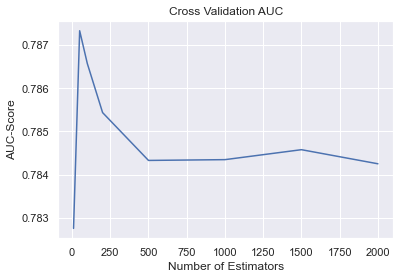

Best number of estimators 50


In [125]:
fig,ax=plt.subplots()
plt.plot(number_of_estimators,cv_auc)

plt.title("Cross Validation AUC")
plt.xlabel("Number of Estimators")
plt.ylabel("AUC-Score")
plt.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best number of estimators",number_of_estimators[index_of_best_auc])

In [127]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train_dataset), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test_dataset), average='macro'))

Train F1-Score: 0.8551823463108341
Test F1-Score: 0.6211257919485588


From the above model AUC scores, it is evident that Random Forest has provided more accuracy than other models. Hence, I am planning on deploying RF model to evaluate the success of the Marketing Campaign.